<a href="https://colab.research.google.com/github/parasgulati8/People-Analytics/blob/VotingClassifier/People_Analytics_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import itertools
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

pd.options.display.max_columns = 100

## Import Data

In [0]:
data = pd.read_excel('drive/My Drive/Colab Notebooks/dataset/Health_Care_Data_train.xlsx')

In [150]:
data.head()

,Non_MD,Other,Primary_Care,Specialist,Surgical,A,B,C,D,E,F,G,H,physician,verysat,q1,q2,q3,q5,q6,q7,q9,q10,q11,q12,q13,q14,q16,q17,q18,q19,q20,q27,q34,q35,q37,q38,q45,q46,q47,q48,q50,q51,q53,q54,q55,q56,q57,q58
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,2.0,2.0,4.0,1.0,5.0,5.0,4.0,5.0,5.0,3.0,4.0,3.0,2.0,2.0,2.0,2.0,5.0,1.0,3.0,4.0,4.0,1.0,5.0,2.0,2.0,3.0,3.0,5.0,5.0,5.0,3.0,3.0,3.0
1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,5.0,1.0,4.0,2.0,2.0,5.0,1.0,3.0,4.0,4.0,4.0,4.0,3.0,2.0,4.0,4.0,4.0,3.0,3.0,5.0,4.0,1.0,3.0,3.0,2.0
2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,5.0,4.0,4.0,4.0,3.0,5.0,4.0,4.0,5.0,3.0,5.0,4.0,4.0,5.0,3.0,3.0,5.0,4.0,4.0,3.0,3.0,2.0,2.0,4.0,4.0,2.0,3.0,2.0,3.0,3.0,5.0,3.0,2.0
3.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,1.0,1.0,5.0,5.0,5.0,1.0
4.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,1.0,2.0,1.0,3.0,4.0,1.0,4.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,4.0,3.0,1.0,4.0,1.0,5.0,3.0,3.0,5.0,5.0,1.0,3.0,1.0,3.0


In [6]:
data.describe()

,physician,verysat,q1,q2,q3,q5,q6,q7,q9,q10,q11,q12,q13,q14,q16,q17,q18,q19,q20,q27,q34,q35,q37,q38,q45,q46,q47,q48,q50,q51,q53,q54,q55,q56,q57,q58
count,1100.000000,1093.000000,1094.000000,1089.000000,1094.000000,1097.000000,1083.000000,1089.000000,1093.000000,1090.000000,1074.000000,1082.000000,1082.000000,1089.000000,1092.000000,1092.000000,1092.000000,1092.000000,1069.000000,1087.000000,1096.000000,1093.000000,1091.000000,1091.000000,1088.000000,1087.000000,1085.000000,1088.000000,1088.000000,1089.000000,1092.000000,1091.000000,1086.000000,1090.000000,1086.000000,1091.000000
mean,0.911818,0.288198,4.469835,3.425161,3.705667,3.710119,3.287165,4.173554,4.535224,3.675229,3.865922,4.222736,4.337338,3.703398,3.427656,3.601648,3.289377,3.065018,3.037418,4.382705,3.354015,3.886551,4.169569,3.766269,2.003676,3.956762,3.787097,4.144301,3.860294,3.943985,2.808608,2.766269,3.000921,3.676147,3.731123,1.876260
std,0.283688,0.453131,0.776192,1.297676,1.178189,1.202119,1.256293,0.979664,0.655977,1.038749,0.837547,0.844704,0.897046,1.293791,1.376537,1.277212,1.324713,1.324653,1.287546,0.796398,1.291575,1.017220,0.888060,1.045479,0.907895,0.899646,0.951702,0.847283,1.076967,0.924336,1.233878,1.198393,1.237285,0.998014,1.116895,1.030852
min,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,0.000000,4.000000,2.000000,3.000000,3.000000,2.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,4.000000,2.000000,4.000000,4.000000,3.000000,1.000000,4.000000,3.000000,4.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,1.000000
50%,1.000000,0.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,5.000000,4.000000,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000,4.000000,2.000000
75%,1.000000,1.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,5.000000,5.000000,2.000000,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,5.000000,2.000000
max,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


# Data Preprocessing

Three Approaches :
- Drop the rows with Null values
- Replace them with mean
- Replace them with Median

### Feature Engineering

In [0]:
dummy = pd.get_dummies(data['Specialty'])
dummy1 = pd.get_dummies(data['Group'])

data = pd.concat([dummy, dummy1, data], axis = 1)
data = data.drop(columns=['Group', 'Specialty'], axis=1)

In [18]:
data

,Non_MD,Other,Primary_Care,Specialist,Surgical,A,B,C,D,E,F,G,H,physician,verysat,q1,q2,q3,q5,q6,q7,q9,q10,q11,q12,q13,q14,q16,q17,q18,q19,q20,q27,q34,q35,q37,q38,q45,q46,q47,q48,q50,q51,q53,q54,q55,q56,q57,q58
0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0.0,5.0,2.0,2.0,4.0,1.0,5.0,5.0,4.0,5.0,5.0,3.0,4.0,3.0,2.0,2.0,2.0,2.0,5.0,1.0,3.0,4.0,4.0,1.0,5.0,2.0,2.0,3.0,3.0,5.0,5.0,5.0,3.0,3.0,3.0
1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0.0,5.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,5.0,1.0,4.0,2.0,2.0,5.0,1.0,3.0,4.0,4.0,4.0,4.0,3.0,2.0,4.0,4.0,4.0,3.0,3.0,5.0,4.0,1.0,3.0,3.0,2.0
2,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0.0,5.0,5.0,4.0,4.0,4.0,3.0,5.0,4.0,4.0,5.0,3.0,5.0,4.0,4.0,5.0,3.0,3.0,5.0,4.0,4.0,3.0,3.0,2.0,2.0,4.0,4.0,2.0,3.0,2.0,3.0,3.0,5.0,3.0,2.0
3,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,1.0,1.0,5.0,5.0,5.0,1.0
4,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0.0,3.0,1.0,1.0,2.0,1.0,3.0,4.0,1.0,4.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,4.0,3.0,1.0,4.0,1.0,5.0,3.0,3.0,5.0,5.0,1.0,3.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,2.0,1.0,5.0,5.0,5.0,2.0
1096,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0.0,5.0,4.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,3.0,2.0,3.0,3.0,4.0,2.0
1097,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,1.0,1.0,5.0,5.0,5.0,1.0
1098,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0.0,5.0,4.0,4.0,5.0,4.0,5.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,5.0,4.0,2.0,4.0,5.0,5.0,3.0,3.0,2.0,3.0,3.0,3.0,4.0,2.0


In [0]:
from sklearn.impute import SimpleImputer 

In [0]:
data.isna().sum()

In [0]:
data_sorted = data.sort_values(by='q58')
data_sorted = data_sorted.reset_index()

df = []
for i in range(1,6):
  imputer = SimpleImputer(strategy='median')
  a = imputer.fit_transform(data_sorted[data_sorted.q58 ==i].iloc[:, :-1], data_sorted[data_sorted.q58 == i].iloc[:, -1])
  df1 = pd.DataFrame(a, columns=data_sorted.columns[:-1])
  df1['q58'] = data_sorted[data_sorted.q58 ==i].iloc[:, -1].values
  df.append(df1)

In [0]:
data = pd.concat((df[0], df[1], df[2], df[3], df[4]))

In [0]:
data = data.set_index('index').sort_values(by='index')

In [0]:
data.isna().sum()

In [0]:
data.dropna(inplace=True)

In [24]:
data.columns

Index(['Non_MD', 'Other', 'Primary_Care', 'Specialist', 'Surgical', 'A', 'B',
       'C', 'D', 'E', 'F', 'G', 'H', 'physician', 'verysat', 'q1', 'q2', 'q3',
       'q5', 'q6', 'q7', 'q9', 'q10', 'q11', 'q12', 'q13', 'q14', 'q16', 'q17',
       'q18', 'q19', 'q20', 'q27', 'q34', 'q35', 'q37', 'q38', 'q45', 'q46',
       'q47', 'q48', 'q50', 'q51', 'q53', 'q54', 'q55', 'q56', 'q57', 'q58'],
      dtype='object')

In [0]:
temp = data.iloc[:, 4:-1]

In [0]:
new_cols = pd.DataFrame(temp.iloc[0].value_counts().sort_index()).T
for i in range(1,len(temp)):
  new_cols = pd.concat((new_cols, pd.DataFrame(temp.iloc[i].value_counts().sort_index()).T))

In [0]:
new_data = pd.concat((new_cols.fillna(0), data), axis=1)

In [9]:
new_data

,0.0,1.0,2.0,3.0,4.0,5.0,Non_MD,Other,Primary_Care,Specialist,Surgical,A,B,C,D,E,F,G,H,physician,verysat,q1,q2,q3,q5,q6,q7,q9,q10,q11,q12,q13,q14,q16,q17,q18,q19,q20,q27,q34,q35,q37,q38,q45,q46,q47,q48,q50,q51,q53,q54,q55,q56,q57,q58
0,9,5,8.0,7.0,5.0,10.0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0.0,5.0,2.0,2.0,4.0,1.0,5.0,5.0,4.0,5.0,5.0,3.0,4.0,3.0,2.0,2.0,2.0,2.0,5.0,1.0,3.0,4.0,4.0,1.0,5.0,2.0,2.0,3.0,3.0,5.0,5.0,5.0,3.0,3.0,3.0
1,9,5,3.0,6.0,16.0,5.0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0.0,5.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,5.0,1.0,4.0,2.0,2.0,5.0,1.0,3.0,4.0,4.0,4.0,4.0,3.0,2.0,4.0,4.0,4.0,3.0,3.0,5.0,4.0,1.0,3.0,3.0,2.0
2,9,2,4.0,10.0,11.0,8.0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0.0,5.0,5.0,4.0,4.0,4.0,3.0,5.0,4.0,4.0,5.0,3.0,5.0,4.0,4.0,5.0,3.0,3.0,5.0,4.0,4.0,3.0,3.0,2.0,2.0,4.0,4.0,2.0,3.0,2.0,3.0,3.0,5.0,3.0,2.0
3,8,6,0.0,0.0,0.0,30.0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,1.0,1.0,5.0,5.0,5.0,1.0
4,9,18,1.0,9.0,4.0,3.0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0.0,3.0,1.0,1.0,2.0,1.0,3.0,4.0,1.0,4.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,4.0,3.0,1.0,4.0,1.0,5.0,3.0,3.0,5.0,5.0,1.0,3.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,8,5,1.0,0.0,6.0,24.0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,2.0,1.0,5.0,5.0,5.0,2.0
1096,8,3,3.0,18.0,11.0,1.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0.0,5.0,4.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,3.0,2.0,3.0,3.0,4.0,2.0
1097,7,7,0.0,0.0,0.0,30.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,1.0,1.0,5.0,5.0,5.0,1.0
1098,8,3,2.0,5.0,16.0,10.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0.0,5.0,4.0,4.0,5.0,4.0,5.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,5.0,4.0,2.0,4.0,5.0,5.0,3.0,3.0,2.0,3.0,3.0,3.0,4.0,2.0


In [0]:
data.isna().sum()

In [0]:
new_data.reset_index(drop=True, inplace=True)

In [0]:
new_data['negatives'] = new_data.loc[:, 1.0] + new_data.loc[:, 2.0]

In [0]:
new_data['positives'] = new_data.loc[:, 4.0] + new_data.loc[:, 5.0]

In [11]:
new_data

,0.0,1.0,2.0,3.0,4.0,5.0,Non_MD,Other,Primary_Care,Specialist,Surgical,A,B,C,D,E,F,G,H,physician,verysat,q1,q2,q3,q5,q6,q7,q9,q10,q11,q12,q13,q14,q16,q17,q18,q19,q20,q27,q34,q35,q37,q38,q45,q46,q47,q48,q50,q51,q53,q54,q55,q56,q57,q58
0,9,5,8.0,7.0,5.0,10.0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0.0,5.0,2.0,2.0,4.0,1.0,5.0,5.0,4.0,5.0,5.0,3.0,4.0,3.0,2.0,2.0,2.0,2.0,5.0,1.0,3.0,4.0,4.0,1.0,5.0,2.0,2.0,3.0,3.0,5.0,5.0,5.0,3.0,3.0,3.0
1,9,5,3.0,6.0,16.0,5.0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0.0,5.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,5.0,1.0,4.0,2.0,2.0,5.0,1.0,3.0,4.0,4.0,4.0,4.0,3.0,2.0,4.0,4.0,4.0,3.0,3.0,5.0,4.0,1.0,3.0,3.0,2.0
2,9,2,4.0,10.0,11.0,8.0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0.0,5.0,5.0,4.0,4.0,4.0,3.0,5.0,4.0,4.0,5.0,3.0,5.0,4.0,4.0,5.0,3.0,3.0,5.0,4.0,4.0,3.0,3.0,2.0,2.0,4.0,4.0,2.0,3.0,2.0,3.0,3.0,5.0,3.0,2.0
3,8,6,0.0,0.0,0.0,30.0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,1.0,1.0,5.0,5.0,5.0,1.0
4,9,18,1.0,9.0,4.0,3.0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0.0,3.0,1.0,1.0,2.0,1.0,3.0,4.0,1.0,4.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,4.0,3.0,1.0,4.0,1.0,5.0,3.0,3.0,5.0,5.0,1.0,3.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,8,5,1.0,0.0,6.0,24.0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,2.0,1.0,5.0,5.0,5.0,2.0
1096,8,3,3.0,18.0,11.0,1.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0.0,5.0,4.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,3.0,2.0,3.0,3.0,4.0,2.0
1097,7,7,0.0,0.0,0.0,30.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,1.0,1.0,5.0,5.0,5.0,1.0
1098,8,3,2.0,5.0,16.0,10.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0.0,5.0,4.0,4.0,5.0,4.0,5.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,5.0,4.0,2.0,4.0,5.0,5.0,3.0,3.0,2.0,3.0,3.0,3.0,4.0,2.0


In [16]:
new_data.columns

Index([        1.0,         2.0,         3.0,         4.0,         5.0,
           'Group', 'Specialty', 'physician',   'verysat',        'q1',
              'q2',        'q3',        'q5',        'q6',        'q7',
              'q9',       'q10',       'q11',       'q12',       'q13',
             'q14',       'q16',       'q17',       'q18',       'q19',
             'q20',       'q27',       'q34',       'q35',       'q37',
             'q38',       'q45',       'q46',       'q47',       'q48',
             'q50',       'q51',       'q53',       'q54',       'q55',
             'q56',       'q57',       'q58', 'negatives'],
      dtype='object')

In [0]:
cols = ['Group', 'Specialty', 'physician',   'verysat',        'q1',
              'q2',        'q3',        'q5',        'q6',        'q7',
              'q9',       'q10',       'q11',       'q12',       'q13',
             'q14',       'q16',       'q17',       'q18',       'q19',
             'q20',       'q27',       'q34',       'q35',       'q37',
             'q38',       'q45',       'q46',       'q47',       'q48',
             'q50',       'q51',       'q53',       'q54',       'q55',
             'q56',       'q57', 'negatives', 3.0, 'positives', 'q58']

In [0]:
new_data = new_data.reindex(columns=cols)

In [0]:
df

In [0]:
df.isna().sum()

### Confusion Matrix

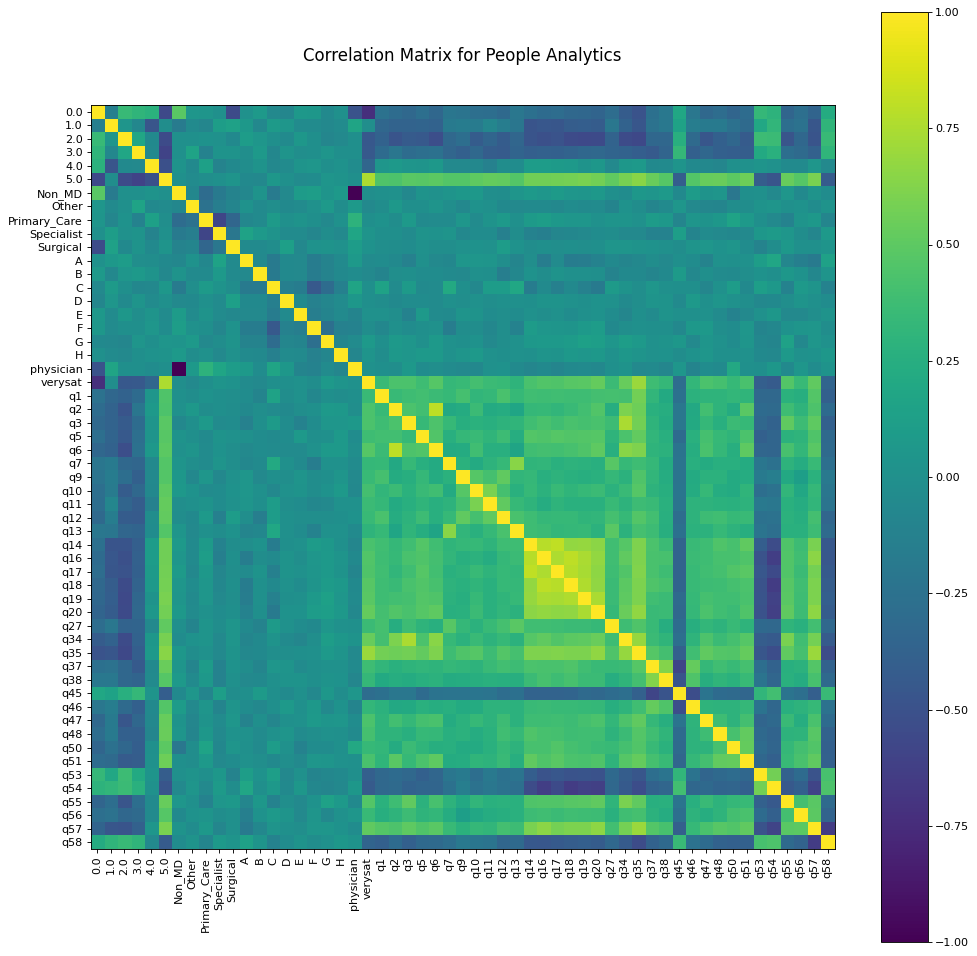

In [13]:
def plotCorrelationMatrix(df, graphWidth):
    filename = 'People Analytics'
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    # print(df.columns)
    corr = df.corr()
    # print(corr)
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

plotCorrelationMatrix(new_data, 15)

In [18]:
df.shape

(1091, 49)

### Using K fold Cross Validation

In [0]:
def get_folds(X,y, k=5):
    return list(StratifiedKFold(n_splits=k, shuffle=True, random_state=1).split(X, y))

In [0]:
X = new_data.iloc[:, :-1]
y = new_data.iloc[:, -1]

In [0]:
folds = get_folds(X, y)

In [0]:
X_train, X_test, y_train, y_test = [], [], [], []

for fold in folds:
  X_train.append(X.values[fold[0]])
  X_test.append(X.values[fold[1]])
  y_train.append(y.values[fold[0]])
  y_test.append(y.values[fold[1]])
                 

### Scaling the data

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
fold = folds[0]
X_train, X_test, y_train, y_test = X.values[fold[0]], X.values[fold[1]], y.values[fold[0]], y.values[fold[1]]

In [0]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [56]:
X_train.shape

(872, 55)

In [0]:
plt.figure(figsize=(25,10))
plt.hist(X_train)

### Samples per Class 

(array([348.,   0., 203.,   0.,   0., 128.,   0.,  29.,   0.,  20.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

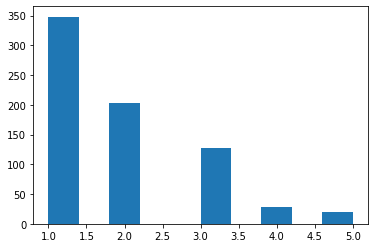

In [18]:
plt.hist(y_train)

(array([87.,  0., 51.,  0.,  0., 32.,  0.,  8.,  0.,  5.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

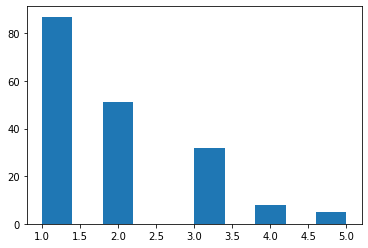

In [19]:
plt.hist(y_test)

# Over Sampling

In [201]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [202]:
smote = SMOTE()
X_train_sampled, y_train_sampled = smote.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

(array([412.,   0., 412.,   0.,   0., 412.,   0., 412.,   0., 412.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

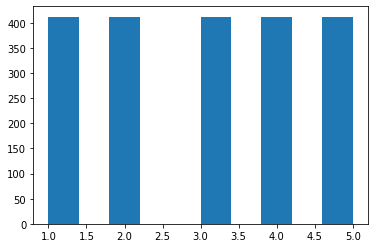

In [203]:
plt.hist(y_train_sampled)

In [19]:
X_train.shape

(1740, 48)

# PCA

In [0]:
from sklearn.decomposition import PCA

In [0]:
pca = PCA(n_components=30)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [0]:
explained_variance = pca.explained_variance_ratio_

In [69]:
pd.Series(explained_variance).sum()

0.9839902368622466

In [0]:
# X_train_original_extracted#.shape

In [134]:
pd.DataFrame(X_train_original_extracted)[0]

0       0.130888
1      25.402741
2      -6.521542
3      -6.988923
4      -4.783511
         ...    
867     2.133667
868    13.856985
869    18.084253
870   -10.641688
871    25.445591
Name: 0, Length: 872, dtype: float64

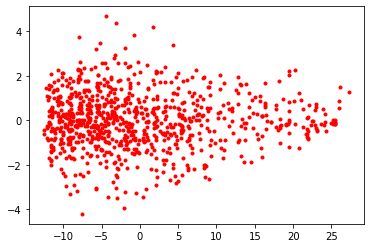

In [140]:
plt.scatter(pd.DataFrame(X_train_original_extracted)[0], pd.DataFrame(X_train_original_extracted)[6], c = 'r', marker='.')

### Kernel PCA

In [0]:
from sklearn.decomposition import KernelPCA

In [0]:
kpca = KernelPCA(kernel='rbf')
X_train_original_kpca= kpca.fit_transform(X_train)
X_test_original_kpca = kpca.transform(X_test)

In [97]:
X_train_original_kpca.shape

(872, 871)

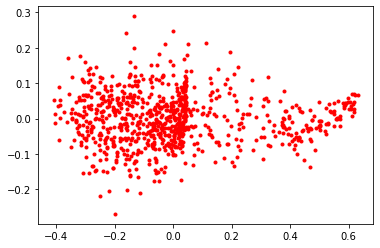

In [129]:
plt.scatter(pd.DataFrame(X_train_original_kpca)[0], pd.DataFrame(X_train_original_kpca)[20], c = 'r', marker='.')

# LDA

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [0]:
lda = LDA()
X_train_original_lda = lda.fit_transform(X_train, y_train)
X_test_original_lda = lda.transform(X_test)

In [22]:
X_train_original_lda.shape

(728, 4)

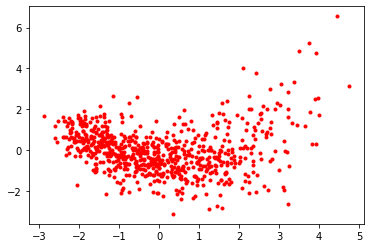

In [24]:
plt.scatter(pd.DataFrame(X_train_original_lda)[0], pd.DataFrame(X_train_original_lda)[1], c = 'r', marker='.')

# concatenating data from all extracted features

In [86]:
X_train.

array([[ 9.,  5.,  8., ...,  5.,  3.,  3.],
       [ 8.,  6.,  0., ...,  5.,  5.,  5.],
       [ 9., 18.,  1., ...,  1.,  3.,  1.],
       ...,
       [ 8.,  5.,  1., ...,  5.,  5.,  5.],
       [ 8.,  3.,  3., ...,  3.,  3.,  4.],
       [ 7.,  7.,  0., ...,  5.,  5.,  5.]])

### How many unique elements in Specialty and Group Column

In [0]:
np.unique(df['H'])

array([ 0.,  1., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [0]:
np.unique(data1['Group'])

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], dtype=object)

In [0]:
np.unique(data1['q58'])

array([1., 2., 3., 4., 5.])

# Class Weight

In [0]:
from sklearn.utils import class_weight

In [0]:
weights = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)
nlabels = len(np.unique(y_train))
weights_dict = { i: weights[i] for i in range(nlabels)}

In [29]:
weights

array([0.4183908 , 0.71724138, 1.1375    , 5.02068966, 7.28      ])

# XGBoost

In [0]:
from xgboost import XGBClassifier

In [145]:
xgb = XGBClassifier(n_estimators=100)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[87, 11,  5,  0,  0],
       [17, 34, 10,  0,  0],
       [ 5, 12, 20,  2,  0],
       [ 2,  4,  2,  1,  0],
       [ 2,  1,  1,  3,  0]])

In [146]:
xgb = XGBClassifier(n_estimators=100)
xgb.fit(X_train_original_extracted, y_train)
y_pred = xgb.predict(X_test_original_extracted)
confusion_matrix(y_test, y_pred)

array([[91,  6,  6,  0,  0],
       [34, 12, 15,  0,  0],
       [10, 10, 19,  0,  0],
       [ 2,  3,  3,  1,  0],
       [ 2,  1,  4,  0,  0]])

In [26]:
xgb = XGBClassifier(n_estimators=100)
xgb.fit(X_train_original_lda, y_train, )
y_pred = xgb.predict(X_test_original_lda)
confusion_matrix(y_test, y_pred)

target_names = [1.0, 2.0, 3.0, 4.0, 5.0]
print(classification_report(y_test, y_pred, target_names))

              precision    recall  f1-score   support

         1.0       0.78      0.80      0.79        87
         2.0       0.44      0.47      0.46        51
         3.0       0.41      0.41      0.41        32
         4.0       0.40      0.25      0.31         8
         5.0       0.00      0.00      0.00         5

    accuracy                           0.60       183
   macro avg       0.41      0.39      0.39       183
weighted avg       0.58      0.60      0.59       183



In [148]:
xgb = XGBClassifier(n_estimators=100)
xgb.fit(X_train_original_kpca, y_train)
y_pred = xgb.predict(X_test_original_kpca)
confusion_matrix(y_test, y_pred)

array([[95,  7,  1,  0,  0],
       [41, 17,  3,  0,  0],
       [23,  5, 11,  0,  0],
       [ 4,  3,  2,  0,  0],
       [ 4,  0,  3,  0,  0]])

# Combining LDA + PCA Data 

In [0]:
X_train_original_lda = pd.DataFrame(X_train_original_lda)
X_train_pca = pd.DataFrame(X_train_pca)

In [0]:
X_train_combined = pd.concat((X_train_original_lda, X_train_pca, pd.DataFrame(X_train)), axis=1)
X_test_combined = pd.concat((pd.DataFrame(X_test_original_lda), pd.DataFrame(X_test_pca), pd.DataFrame(X_test)), axis=1)

In [0]:
X_train_combined.columns = list(range(X_train_combined.shape[1]))

In [0]:
X_test_combined.columns = list(range(X_test_combined.shape[1]))

In [86]:
X_train_combined.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87
0,1.278501,-1.106766,1.569399,1.097511,-5.858249,-2.808667,-0.632645,2.378357,-2.085043,0.259047,1.441301,1.564285,-0.822453,0.138998,0.623055,-1.915856,0.579502,-0.936325,-0.444839,0.939183,-0.392192,-0.691596,-1.202754,1.053925,0.111923,0.018210,-1.455219,0.585621,-0.841977,1.606486,0.200679,-0.796831,0.824446,1.110503,9.0,5.0,3.0,6.0,16.0,5.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,5.0,1.0,4.0,2.0,2.0,5.0,1.0,3.0,4.0,4.0,4.0,4.0,3.0,2.0,4.0,4.0,4.0,3.0,3.0,5.0,4.0,1.0,3.0,3.0
1,0.500487,-1.995463,-0.322949,1.596876,-2.245852,0.394857,5.454793,-0.809398,-0.234432,-1.153185,0.097162,1.972448,0.494434,0.828912,0.521044,-0.520515,0.143281,-0.905434,1.235104,0.273616,-2.063567,0.972415,-0.249697,1.169622,1.023982,1.207484,0.063732,-0.495962,-0.022645,0.097310,0.041937,-1.011526,0.471752,0.887014,9.0,2.0,4.0,10.0,11.0,8.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,5.0,4.0,4.0,4.0,3.0,5.0,4.0,4.0,5.0,3.0,5.0,4.0,4.0,5.0,3.0,3.0,5.0,4.0,4.0,3.0,3.0,2.0,2.0,4.0,4.0,2.0,3.0,2.0,3.0,3.0,5.0,3.0
2,3.989709,1.749016,-0.210714,-0.857814,-6.927045,14.388886,-4.354030,11.234174,1.720671,1.168432,1.379103,-1.002559,-1.546029,-1.910424,-0.287984,-0.251521,-0.436625,0.049129,-0.034137,1.197141,0.910537,0.794804,-0.632964,-0.241247,1.277081,-1.191453,0.319784,-0.518929,0.219938,0.480890,-0.489193,-0.472344,0.918314,0.778975,9.0,18.0,1.0,9.0,4.0,3.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,1.0,2.0,1.0,3.0,4.0,1.0,4.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,4.0,3.0,1.0,4.0,1.0,5.0,3.0,3.0,5.0,5.0,1.0,3.0,1.0
3,0.293734,0.136748,0.382654,-1.649353,-4.505116,-7.114547,-3.560336,-0.968583,0.185818,1.608058,-1.752096,-0.157738,-0.561638,-1.271750,1.326904,-0.286917,-0.300533,1.386338,1.539475,0.142715,-0.718498,1.172336,0.614989,-0.705186,-1.739613,-0.089627,0.665688,-0.071076,-0.271461,-0.626682,0.388640,0.607817,0.756195,-0.003170,9.0,3.0,5.0,2.0,19.0,6.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,2.0,4.0,4.0,2.0,5.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,2.0,2.0,1.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,5.0,4.0,3.0,4.0,4.0,4.0,3.0
4,-1.676153,1.572511,-0.736925,0.318514,25.100779,4.605069,0.970911,0.417760,0.218466,-0.901718,0.318692,-0.231781,0.045423,0.243500,0.302464,0.167796,-0.292177,-0.110212,0.237774,-0.039527,-0.046855,-0.154060,0.130754,-0.306663,0.377449,-0.020840,0.335616,0.026841,-0.119473,0.124454,0.256309,0.197245,0.313905,0.110544,8.0,6.0,0.0,0.0,0.0,30.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,1.0,1.0,5.0,5.0,5.0


# Voting Classifier

In [0]:
from sklearn.ensemble import VotingClassifier

In [0]:
clf1 = LogisticRegression(C=0.1, class_weight=weights_dict, random_state=0)
clf2 = RandomForestClassifier(500, class_weight=weights_dict ,random_state=0)
clf3 = XGBClassifier(n_estimators=250, n_jobs=-1)
clf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('xgb', clf3)], voting='soft')

In [166]:
clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=0.1,
                                                 class_weight={0: 0.42330097087378643,
                                                               1: 0.7147540983606557,
                                                               2: 1.1324675324675324,
                                                               3: 4.589473684210526,
                                                               4: 7.266666666666667},
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=0, solver='lbfgs',
                       

In [0]:
y_pred = clf.predict(X_test)

In [168]:
confusion_matrix(y_test, y_pred)

array([[88, 10,  4,  0,  1],
       [17, 33, 10,  1,  0],
       [ 4,  8, 25,  2,  0],
       [ 2,  2,  4,  0,  1],
       [ 2,  1,  3,  1,  0]])

In [0]:
target_names = [1.0, 2.0, 3.0, 4.0, 5.0]

In [178]:
print(classification_report(y_test, y_pred, target_names))

              precision    recall  f1-score   support

         1.0       0.78      0.85      0.81       103
         2.0       0.61      0.54      0.57        61
         3.0       0.54      0.64      0.59        39
         4.0       0.00      0.00      0.00         9
         5.0       0.00      0.00      0.00         7

    accuracy                           0.67       219
   macro avg       0.39      0.41      0.40       219
weighted avg       0.63      0.67      0.65       219



In [53]:
clf1 = LogisticRegression(C=0.1, class_weight=weights_dict, random_state=0)
clf2 = RandomForestClassifier(500, class_weight=weights_dict ,random_state=0)
clf3 = XGBClassifier(n_estimators=250, n_jobs=-1)
clf4 = GaussianNB()
clf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('xgb', clf3), ('gnb', clf4)], voting='soft')

clf.fit(X_train_original_lda, y_train)
y_pred = clf.predict(X_test_original_lda)
print (confusion_matrix(y_test, y_pred))

target_names = [1.0, 2.0, 3.0, 4.0, 5.0]
print(classification_report(y_test, y_pred, target_names))

cohen_kappa_score(y_test, y_pred)

[[70 14  3  0  0]
 [17 24  9  1  0]
 [ 1 12 14  2  3]
 [ 0  1  4  2  1]
 [ 0  1  2  0  2]]
              precision    recall  f1-score   support

         1.0       0.80      0.80      0.80        87
         2.0       0.46      0.47      0.47        51
         3.0       0.44      0.44      0.44        32
         4.0       0.40      0.25      0.31         8
         5.0       0.33      0.40      0.36         5

    accuracy                           0.61       183
   macro avg       0.49      0.47      0.47       183
weighted avg       0.61      0.61      0.61       183



0.4117354099696654

In [93]:
clf1 = LogisticRegression(C=0.1, class_weight=weights_dict, random_state=0)
clf2 = RandomForestClassifier(500, class_weight=weights_dict ,random_state=0)
clf3 = XGBClassifier(n_estimators=250, n_jobs=-1)
clf4 = GaussianNB()
clf5 = SVC(C=0.1, kernel='rbf',random_state=0, probability=True, class_weight=weights_dict)
clf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('xgb', clf3), ('gnb', clf4), ('svc', clf5)], voting='soft')

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print (confusion_matrix(y_test, y_pred))

target_names = [1.0, 2.0, 3.0, 4.0, 5.0]
print(classification_report(y_test, y_pred, target_names))

cohen_kappa_score(y_test, y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[[74 12  1  0  0]
 [18 25  4  2  2]
 [ 0 12 14  4  2]
 [ 1  1  4  1  1]
 [ 0  0  2  1  2]]
              precision    recall  f1-score   support

         1.0       0.80      0.85      0.82        87
         2.0       0.50      0.49      0.50        51
         3.0       0.56      0.44      0.49        32
         4.0       0.12      0.12      0.12         8
         5.0       0.29      0.40      0.33         5

    accuracy                           0.63       183
   macro avg       0.45      0.46      0.45       183
weighted avg       0.63      0.63      0.63       183



0.4413868513371908

Combined Data (LDA+PCA+Origina)

In [92]:
clf1 = LogisticRegression(C=0.1, class_weight=weights_dict, random_state=0)
clf2 = RandomForestClassifier(500, class_weight=weights_dict ,random_state=0)
clf3 = XGBClassifier(n_estimators=250, n_jobs=-1)
clf4 = GaussianNB()
clf5 = SVC(C=0.1, kernel='rbf',random_state=0, probability=True, class_weight=weights_dict)
clf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('xgb', clf3), ('gnb', clf4), ('svc', clf5)], voting='soft')

clf.fit(X_train_combined, y_train)
y_pred = clf.predict(X_test_combined)
print (confusion_matrix(y_test, y_pred))

target_names = [1.0, 2.0, 3.0, 4.0, 5.0]
print(classification_report(y_test, y_pred, target_names))

cohen_kappa_score(y_test, y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[[72 13  1  0  1]
 [14 30  3  2  2]
 [ 1 11 13  4  3]
 [ 0  1  4  2  1]
 [ 0  0  3  0  2]]
              precision    recall  f1-score   support

         1.0       0.83      0.83      0.83        87
         2.0       0.55      0.59      0.57        51
         3.0       0.54      0.41      0.46        32
         4.0       0.25      0.25      0.25         8
         5.0       0.22      0.40      0.29         5

    accuracy                           0.65       183
   macro avg       0.48      0.49      0.48       183
weighted avg       0.66      0.65      0.65       183



0.4733339329076356

In [94]:
clf1 = LogisticRegression(C=0.1, class_weight=weights_dict, random_state=0)
clf2 = RandomForestClassifier(500, class_weight=weights_dict ,random_state=0)
clf3 = XGBClassifier(n_estimators=250, n_jobs=-1)
clf4 = GaussianNB()
clf5 = SVC(C=0.1, kernel='rbf',random_state=0, probability=True, class_weight=weights_dict)
clf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('xgb', clf3), ('gnb', clf4), ('svc', clf5)], voting='soft')

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print (confusion_matrix(y_test, y_pred))

target_names = [1.0, 2.0, 3.0, 4.0, 5.0]
print(classification_report(y_test, y_pred, target_names))

cohen_kappa_score(y_test, y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[[74 12  1  0  0]
 [18 25  4  2  2]
 [ 0 12 14  4  2]
 [ 1  1  4  1  1]
 [ 0  0  2  1  2]]
              precision    recall  f1-score   support

         1.0       0.80      0.85      0.82        87
         2.0       0.50      0.49      0.50        51
         3.0       0.56      0.44      0.49        32
         4.0       0.12      0.12      0.12         8
         5.0       0.29      0.40      0.33         5

    accuracy                           0.63       183
   macro avg       0.45      0.46      0.45       183
weighted avg       0.63      0.63      0.63       183



0.4413868513371908

In [95]:
clf1 = LogisticRegression(C=0.1, class_weight=weights_dict, random_state=0)
clf2 = RandomForestClassifier(500, class_weight=weights_dict ,random_state=0)
clf3 = XGBClassifier(n_estimators=250, n_jobs=-1)
clf4 = GaussianNB()
clf5 = SVC(C=0.1, kernel='rbf',random_state=0, probability=True, class_weight=weights_dict)
clf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('xgb', clf3), ('gnb', clf4), ('svc', clf5)], voting='soft')

clf.fit(X_train_original_lda, y_train)
y_pred = clf.predict(X_test_original_lda)
print (confusion_matrix(y_test, y_pred))

target_names = [1.0, 2.0, 3.0, 4.0, 5.0]
print(classification_report(y_test, y_pred, target_names))

cohen_kappa_score(y_test, y_pred)

ValueError: ignored

In [188]:
clf1 = LogisticRegression(C=0.1, class_weight=weights_dict, random_state=0)
clf2 = RandomForestClassifier(500, class_weight=weights_dict ,random_state=0)
clf3 = XGBClassifier(n_estimators=250, n_jobs=-1)
clf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('xgb', clf3)], voting='soft')

clf.fit(X_train_original_extracted, y_train)
y_pred = clf.predict(X_test_original_extracted)

print(confusion_matrix(y_test, y_pred))

target_names = [1.0, 2.0, 3.0, 4.0, 5.0]
print(classification_report(y_test, y_pred, target_names))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[[90  6  7  0  0]
 [30 20 10  1  0]
 [11  8 20  0  0]
 [ 1  2  5  0  1]
 [ 2  1  4  0  0]]
              precision    recall  f1-score   support

         1.0       0.67      0.87      0.76       103
         2.0       0.54      0.33      0.41        61
         3.0       0.43      0.51      0.47        39
         4.0       0.00      0.00      0.00         9
         5.0       0.00      0.00      0.00         7

    accuracy                           0.59       219
   macro avg       0.33      0.34      0.33       219
weighted avg       0.54      0.59      0.55       219



In [189]:
clf1 = LogisticRegression(C=0.1, class_weight=weights_dict, random_state=0)
clf2 = RandomForestClassifier(500, class_weight=weights_dict ,random_state=0)
clf3 = XGBClassifier(n_estimators=250, n_jobs=-1)
clf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('xgb', clf3)], voting='soft')

clf.fit(X_train_original_kpca, y_train)
y_pred = clf.predict(X_test_original_kpca)

print(confusion_matrix(y_test, y_pred))

target_names = [1.0, 2.0, 3.0, 4.0, 5.0]
print(classification_report(y_test, y_pred, target_names))

[[95  7  1  0  0]
 [42 16  3  0  0]
 [24  4 11  0  0]
 [ 4  3  2  0  0]
 [ 5  0  2  0  0]]
              precision    recall  f1-score   support

         1.0       0.56      0.92      0.70       103
         2.0       0.53      0.26      0.35        61
         3.0       0.58      0.28      0.38        39
         4.0       0.00      0.00      0.00         9
         5.0       0.00      0.00      0.00         7

    accuracy                           0.56       219
   macro avg       0.33      0.29      0.29       219
weighted avg       0.51      0.56      0.49       219



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# KNN

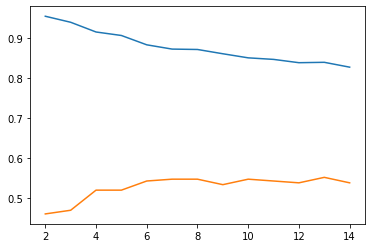

In [71]:
acc = []
acc_test = []
for i in range(2,15):
        knn = KNeighborsClassifier(i)
        knn.fit(X_train, y_train)
        acc.append(accuracy_score(y_train, knn.predict(X_train)))
        acc_test.append(accuracy_score(y_test, knn.predict(X_test)))
        
plt.figure()
plt.plot(range(2,15), acc)
plt.plot(range(2,15), acc_test)
plt.show()

In [72]:
max(acc_test)

0.5525114155251142

Fold =  0


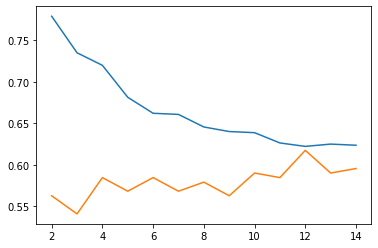

Fold =  1


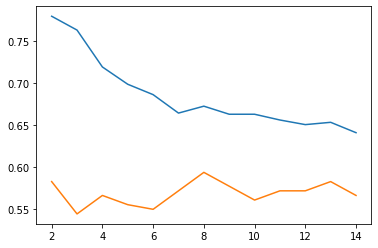

Fold =  2


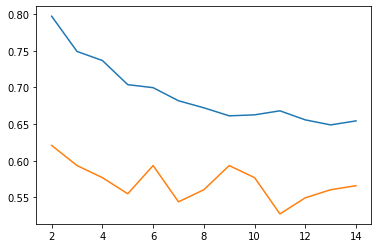

Fold =  3


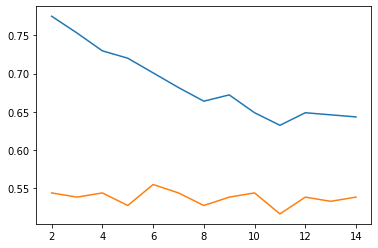

Fold =  4


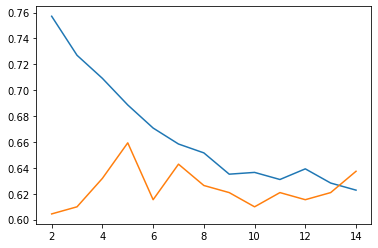

In [0]:
accuracies = []
accuracies_test = []
for j in range(5):
    print('Fold = ',j)  
    acc = []
    acc_test = []
    for i in range(2,15):
        knn = KNeighborsClassifier(i)
        knn.fit(X_train[j], y_train[j])
        acc.append(accuracy_score(y_train[j], knn.predict(X_train[j])))
        acc_test.append(accuracy_score(y_test[j], knn.predict(X_test[j])))
        
    plt.figure()
    plt.plot(range(2,15), acc)
    plt.plot(range(2,15), acc_test)
    plt.show()

    accuracies.append(acc)
    accuracies_test.append(acc_test)

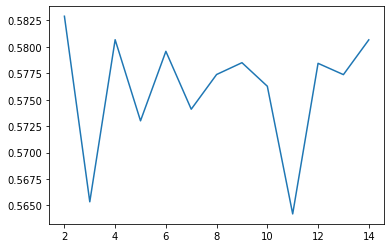

In [0]:
avg = []
for i in range(len(accuracies_test[0])):
  avg.append(sum([j[i] for j in accuracies_test])/5)

plt.plot(range(2,15), avg)

# Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression

In [76]:
X_train.shape

(872, 4)

In [199]:
#correct = 116
lr = LogisticRegression(C=0.1, class_weight='balanced', random_state=0)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
confusion_matrix(y_test, y_pred)

target_names = [1.0, 2.0, 3.0, 4.0, 5.0]
print(classification_report(y_test, y_pred, target_names))

              precision    recall  f1-score   support

         1.0       0.81      0.70      0.75       103
         2.0       0.56      0.48      0.51        61
         3.0       0.45      0.38      0.42        39
         4.0       0.14      0.33      0.20         9
         5.0       0.12      0.43      0.19         7

    accuracy                           0.56       219
   macro avg       0.42      0.46      0.41       219
weighted avg       0.63      0.56      0.58       219



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [205]:
#103
lr = LogisticRegression(C=0.1, class_weight='balanced', random_state=0)
lr.fit(X_train_sampled, y_train_sampled)
y_pred = lr.predict(X_test)
confusion_matrix(y_test, y_pred)

target_names = [1.0, 2.0, 3.0, 4.0, 5.0]
print(classification_report(y_test, y_pred, target_names))

              precision    recall  f1-score   support

         1.0       0.78      0.70      0.74       103
         2.0       0.49      0.43      0.46        61
         3.0       0.47      0.46      0.47        39
         4.0       0.18      0.33      0.23         9
         5.0       0.11      0.29      0.15         7

    accuracy                           0.55       219
   macro avg       0.41      0.44      0.41       219
weighted avg       0.60      0.55      0.57       219



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [207]:
#101
lr = LogisticRegression(C=0.1, class_weight='balanced')
lr.fit(X_train_original_extracted, y_train)
y_pred = lr.predict(X_test_original_extracted)
confusion_matrix(y_test, y_pred)

target_names = [1.0, 2.0, 3.0, 4.0, 5.0]
print(classification_report(y_test, y_pred, target_names))

              precision    recall  f1-score   support

         1.0       0.86      0.70      0.77       103
         2.0       0.57      0.49      0.53        61
         3.0       0.44      0.41      0.43        39
         4.0       0.14      0.33      0.19         9
         5.0       0.12      0.43      0.19         7

    accuracy                           0.57       219
   macro avg       0.43      0.47      0.42       219
weighted avg       0.65      0.57      0.60       219



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [208]:
#117
lr = LogisticRegression(C=0.1, class_weight='balanced')
lr.fit(X_train_original_extracted, y_train)
y_pred = lr.predict(X_test_original_extracted)
confusion_matrix(y_test, y_pred)

target_names = [1.0, 2.0, 3.0, 4.0, 5.0]
print(classification_report(y_test, y_pred, target_names))

              precision    recall  f1-score   support

         1.0       0.86      0.70      0.77       103
         2.0       0.57      0.49      0.53        61
         3.0       0.44      0.41      0.43        39
         4.0       0.14      0.33      0.19         9
         5.0       0.12      0.43      0.19         7

    accuracy                           0.57       219
   macro avg       0.43      0.47      0.42       219
weighted avg       0.65      0.57      0.60       219



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [119]:
#110
lr = LogisticRegression(C=0.1)
lr.fit(X_train_kpca, y_train_sampled)
y_pred = lr.predict(X_test_kpca)
confusion_matrix(y_test, y_pred)

array([[64, 17,  4,  2,  0],
       [14, 27,  7,  3,  0],
       [ 0,  6, 16,  8,  2],
       [ 0,  1,  5,  2,  0],
       [ 0,  0,  2,  2,  1]])

In [77]:
#114
lr = LogisticRegression(C=0.1)
lr.fit(X_train_original_kpca, y_train)
y_pred = lr.predict(X_test_original_kpca)
confusion_matrix(y_test, y_pred)

array([[90, 13,  0,  0,  0],
       [38, 23,  0,  0,  0],
       [31,  8,  0,  0,  0],
       [ 7,  2,  0,  0,  0],
       [ 7,  0,  0,  0,  0]])

In [136]:
#98
lr = LogisticRegression(C=0.1)
lr.fit(X_train_lda, y_train_sampled)
y_pred = lr.predict(X_test_lda)
confusion_matrix(y_test, y_pred)

array([[63, 12,  6,  3,  3],
       [15, 20,  8,  2,  6],
       [ 1,  9,  9,  8,  5],
       [ 1,  0,  3,  3,  1],
       [ 0,  0,  2,  0,  3]])

In [134]:
#120
lr = LogisticRegression(C=0.1)
lr.fit(X_train_original_lda, y_train)
y_pred = lr.predict(X_test_original_lda)
confusion_matrix(y_test, y_pred)

array([[79,  6,  2,  0,  0],
       [20, 26,  5,  0,  0],
       [ 1, 15, 13,  2,  1],
       [ 0,  2,  4,  2,  0],
       [ 1,  1,  3,  0,  0]])

In [0]:
# from sklearn.metrics import confusion_matrix


In [62]:
cm #Kernel PCA

array([[82, 17,  4,  0,  0],
       [26, 25, 10,  0,  0],
       [ 8, 10, 21,  0,  0],
       [ 1,  3,  5,  0,  0],
       [ 2,  0,  5,  0,  0]])

In [68]:
cm #LDA

array([[87, 11,  5,  0,  0],
       [25, 29,  7,  0,  0],
       [ 4, 12, 23,  0,  0],
       [ 0,  2,  7,  0,  0],
       [ 2,  0,  5,  0,  0]])

In [80]:
cm #LDA , n_components = None , X_train shape = (-1,4)

array([[87, 10,  5,  0,  1],
       [25, 28,  7,  0,  1],
       [ 3, 14, 19,  1,  2],
       [ 0,  3,  6,  0,  0],
       [ 2,  1,  3,  0,  1]])

# Random Forest 

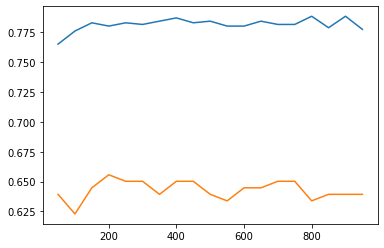

In [91]:
acc = []
acc_test = []
for i in range(50,1000,50):
    rfc = RandomForestClassifier(i, max_leaf_nodes=32)
    rfc.fit(X_train, y_train)
    acc.append(accuracy_score(y_train, rfc.predict(X_train)))
    acc_test.append(accuracy_score(y_test, rfc.predict(X_test)))

plt.figure()
plt.plot(range(50,1000,50), acc)
plt.plot(range(50,1000,50), acc_test)
plt.show()


In [92]:
rfc = RandomForestClassifier(200, max_leaf_nodes=32)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[74, 11,  2,  0,  0],
       [19, 27,  5,  0,  0],
       [ 0, 13, 19,  0,  0],
       [ 1,  2,  5,  0,  0],
       [ 1,  0,  4,  0,  0]])

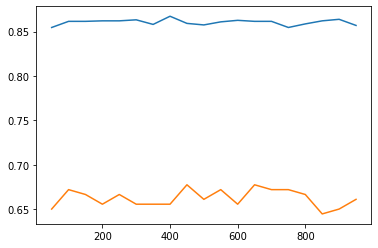

In [94]:
acc = []
acc_test = []
for i in range(50,1000,50):
    rfc = RandomForestClassifier(i, max_leaf_nodes=32)
    rfc.fit(X_train_sampled, y_train_sampled)
    acc.append(accuracy_score(y_train_sampled, rfc.predict(X_train_sampled)))
    acc_test.append(accuracy_score(y_test, rfc.predict(X_test)))

plt.figure()
plt.plot(range(50,1000,50), acc)
plt.plot(range(50,1000,50), acc_test)
plt.show()

In [98]:
range(50,1000,50)[np.argmax(acc_test)]

450

In [95]:
rfc = RandomForestClassifier(450, max_leaf_nodes=32)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[73, 13,  1,  0,  0],
       [20, 26,  5,  0,  0],
       [ 1, 12, 19,  0,  0],
       [ 0,  3,  5,  0,  0],
       [ 1,  1,  3,  0,  0]])

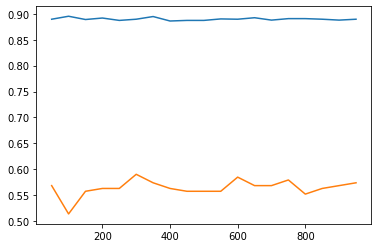

In [100]:
acc = []
acc_test = []
for i in range(50,1000,50):
    rfc = RandomForestClassifier(i, max_leaf_nodes=32)
    rfc.fit(X_train_extracted, y_train_sampled)
    acc.append(accuracy_score(y_train_sampled, rfc.predict(X_train_extracted)))
    acc_test.append(accuracy_score(y_test, rfc.predict(X_test_extracted)))

plt.figure()
plt.plot(range(50,1000,50), acc)
plt.plot(range(50,1000,50), acc_test)
plt.show()

In [101]:
n = range(50,1000,50)[np.argmax(acc_test)]
rfc = RandomForestClassifier(n, max_leaf_nodes=32)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[73, 13,  1,  0,  0],
       [18, 29,  4,  0,  0],
       [ 1, 11, 20,  0,  0],
       [ 0,  3,  5,  0,  0],
       [ 1,  0,  4,  0,  0]])

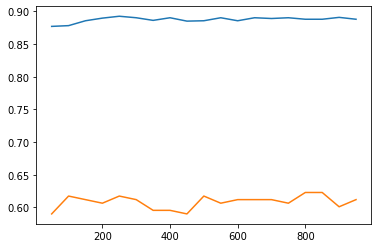

array([[73, 13,  1,  0,  0],
       [19, 27,  5,  0,  0],
       [ 1, 13, 18,  0,  0],
       [ 1,  2,  5,  0,  0],
       [ 1,  0,  4,  0,  0]])

In [106]:
acc = []
acc_test = []
for i in range(50,1000,50):
    rfc = RandomForestClassifier(i, max_leaf_nodes=32)
    rfc.fit(X_train_kpca, y_train_sampled)
    acc.append(accuracy_score(y_train_sampled, rfc.predict(X_train_kpca)))
    acc_test.append(accuracy_score(y_test, rfc.predict(X_test_kpca)))

plt.figure()
plt.plot(range(50,1000,50), acc)
plt.plot(range(50,1000,50), acc_test)
plt.show()

n = range(50,1000,50)[np.argmax(acc_test)]
rfc = RandomForestClassifier(n, max_leaf_nodes=32)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
confusion_matrix(y_test, y_pred)

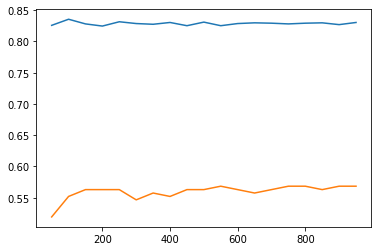

array([[73, 13,  1,  0,  0],
       [20, 26,  5,  0,  0],
       [ 0, 13, 19,  0,  0],
       [ 0,  3,  5,  0,  0],
       [ 1,  0,  4,  0,  0]])

In [111]:
acc = []
acc_test = []
for i in range(50,1000,50):
    rfc = RandomForestClassifier(i, max_leaf_nodes=32)
    rfc.fit(X_train_lda, y_train_sampled)
    acc.append(accuracy_score(y_train_sampled, rfc.predict(X_train_lda)))
    acc_test.append(accuracy_score(y_test, rfc.predict(X_test_lda)))

plt.figure()
plt.plot(range(50,1000,50), acc)
plt.plot(range(50,1000,50), acc_test)
plt.show()

n = range(50,1000,50)[np.argmax(acc_test)]
rfc = RandomForestClassifier(n, max_leaf_nodes=32)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
confusion_matrix(y_test, y_pred)

In [104]:
X_test_kpca.shape

(183, 10)

In [86]:
X_train.shape

(872, 48)

In [82]:
max(acc_test)

0.6301369863013698

Fold =  0


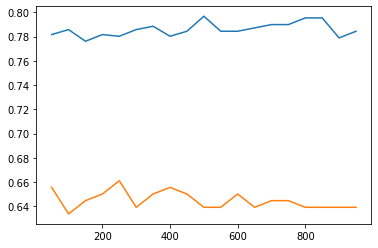

Fold =  1


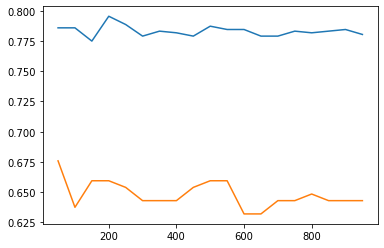

Fold =  2


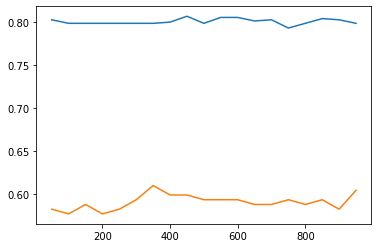

Fold =  3


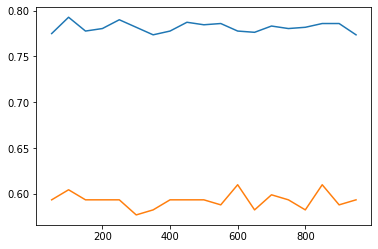

Fold =  4


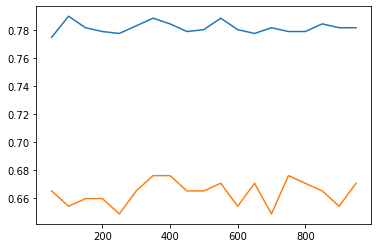

In [0]:
accuracies = []
accuracies_test = []

for j in range(5):
    # X_train, X_test, y_train, y_test = X.iloc[fold[0], :], X.iloc[fold[1], :], y.iloc[fold[0]], y.iloc[fold[1]]
    print ('Fold = ', j)
    acc = []
    acc_test = []
    for i in range(50,1000,50):
        rfc = RandomForestClassifier(i, max_leaf_nodes=32)
        rfc.fit(X_train[j], y_train[j])
        acc.append(accuracy_score(y_train[j], rfc.predict(X_train[j])))
        acc_test.append(accuracy_score(y_test[j], rfc.predict(X_test[j])))
    
    plt.figure()
    plt.plot(range(50,1000,50), acc)
    plt.plot(range(50,1000,50), acc_test)
    plt.show()

    accuracies.append(acc)
    accuracies_test.append(acc_test)

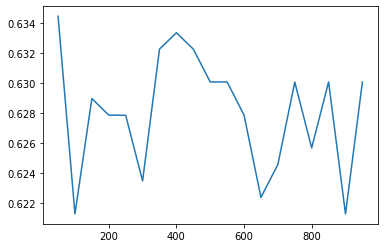

In [0]:
# Finding average accuracy for each random classifier across 5 folds

avg = []
for i in range(len(accuracies_test[0])):
  avg.append(sum([j[i] for j in accuracies_test])/5)

plt.plot(range(50,1000,50), avg)

In [0]:
i = 0
dic = {}
for j in range(50,1000,50):
  dic[j] = avg[i]
  i = i+1

dic[400] # 0.6333573530294843 for 500

0.6333453431814087

# Deep Learning

In [0]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, ReLU, PReLU, Input, concatenate
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.models import Model

In [0]:
for i in range(5):
  y_train[i] = pd.get_dummies(y_train[i]).values
  y_test[i] = pd.get_dummies(y_test[i]).values

In [0]:
y_train_sampled_oh = pd.get_dummies(y_train_sampled).values
y_test_oh = pd.get_dummies(y_test).values

In [0]:
y_train_oh = pd.get_dummies(y_train).values
y_test_oh = pd.get_dummies(y_test).values

In [22]:
X_train.shape

(1740, 48)

In [89]:
type(y_test)

numpy.ndarray

In [89]:
model = Sequential()
model.add(Dense(8, activation='sigmoid', input_dim=10, kernel_initializer=glorot_uniform(seed=42)))
model.add(Dense(16, activation='sigmoid', kernel_initializer=glorot_uniform(seed=42)))
model.add(Dense(5, activation='softmax', kernel_initializer=glorot_uniform(seed=42)))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_16 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_17 (Dense)             (None, 5)                 85        
Total params: 317
Trainable params: 317
Non-trainable params: 0
_________________________________________________________________


In [64]:
pd.DataFrame(X_train_extracted)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,0.274984,-1.401024,0.399271,0.906126,2.038894,-0.110110,0.433434,-1.093899,-1.119946,0.785988,0.198266,1.608352,0.189858,0.629967,-0.231111,-0.280750,-1.820445,-0.371282,0.263521,0.775079,-0.525316,-1.231107,-1.294322,0.790042,1.279282,1.420477,-0.651064,0.023985,-0.337157,-1.306310,1.527685,-0.036674,0.480895,-1.136643,-1.013250,1.051520,1.155782,-0.245160,0.274156,-0.666776
1,-2.548582,-0.861762,-2.163260,-0.511786,0.339211,-1.410229,0.847077,-0.774248,-1.084657,-0.306465,2.052343,0.638570,-0.081136,0.643812,-1.862912,-0.435480,-0.589286,-0.189734,-0.039815,0.289223,0.430832,-0.143289,-0.307286,-0.455116,0.185708,1.145144,1.025075,0.121685,-0.332578,0.061079,1.095549,-0.415523,-0.009171,-0.630558,-0.783776,0.603327,0.602253,-0.194546,0.049515,-0.529873
2,8.026487,1.857498,1.735611,1.911050,0.082014,0.903972,-1.314730,0.547105,0.653755,0.223417,0.202952,-0.156554,0.956188,-0.388769,-1.171642,1.405502,-0.158206,0.628050,0.434007,-0.976721,-0.328063,-1.161108,-0.410576,0.337572,0.984885,0.412886,0.175709,-0.357138,-0.219915,0.564716,0.231278,-0.073307,-0.130580,1.387115,-0.375963,0.212433,-0.057696,0.080635,0.262591,0.089112
3,-1.613496,1.212421,1.574653,-1.609167,0.509879,0.501940,-0.970696,0.878355,-0.382306,1.815783,0.450607,-1.541972,-0.024519,0.473071,-0.268886,-0.818491,1.599204,-1.320507,0.838179,-0.463946,-0.079216,1.123747,-0.236281,-1.152671,-0.126337,0.594442,0.518101,0.351903,0.357323,0.487780,-0.058102,-0.095202,0.449693,0.274133,0.053062,0.532937,-0.784418,0.069345,0.322465,-0.043971
4,-9.061936,-0.757847,-0.052521,0.223036,-1.083414,-0.172030,0.619513,0.897510,0.106771,-0.193061,0.030743,-0.384632,-0.209404,0.030645,-0.107807,0.367401,0.025907,0.245888,0.007474,-0.190702,-0.473121,0.013607,0.173851,-0.484771,0.127676,0.271005,-0.244573,-0.450724,0.007395,0.153077,-0.053270,0.160678,-0.135504,0.172140,-0.211719,0.175333,-0.053806,0.013505,0.531864,-0.084710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1735,5.986275,-0.303764,3.061175,-0.772976,0.273581,0.454107,2.674290,0.915857,1.061281,-1.752485,-0.393607,-1.192666,-0.671740,0.026581,0.705101,-0.500508,0.288552,0.165106,0.649788,0.029060,-0.894213,-0.572484,0.945645,-0.805200,-0.087773,0.346104,0.294688,-0.235107,-0.288964,0.116000,0.377730,0.256536,-0.295720,-0.129858,0.085419,-0.407161,-0.067121,-0.263876,-0.121002,0.090065
1736,5.172788,-2.608674,-1.841391,-0.339715,-1.643712,-0.206029,0.664681,-1.618932,0.817960,0.282132,-0.544360,-0.148279,-1.037886,0.260531,-2.166656,-0.382947,-1.136072,0.352506,0.298725,-0.200593,-0.611657,1.479707,-0.229350,-0.154527,0.126009,-0.096728,0.121539,0.294966,-0.675717,-0.001138,0.031574,0.015535,-0.416115,0.164760,-0.261676,0.061652,0.332707,0.118748,-0.011435,-0.222879
1737,0.430994,1.213734,0.304619,1.115945,1.968397,0.589619,-0.575145,-2.714482,-1.032968,0.456842,0.653829,0.035777,-0.851120,0.696713,-0.488578,-1.515946,-0.033722,0.252389,-0.141317,0.101161,-0.144890,-0.883978,0.793605,-0.126651,-0.641130,-0.142476,-1.132525,0.188617,0.049611,-0.480308,0.277147,0.160220,-0.116027,0.247139,-0.072536,-0.125095,-0.220018,0.274400,-0.106183,0.077037
1738,-6.504090,0.271258,-0.433417,-0.000232,-0.365147,-0.534086,-0.024778,0.711197,0.546468,0.594134,-0.880871,0.004316,-0.019154,0.420521,-0.044247,-0.170715,-0.047150,-0.084778,0.589681,-0.312342,0.533819,-0.162280,-0.057279,0.194854,-0.160209,-0.103542,-0.018073,-0.061549,-0.045032,-0.522832,-0.229292,0.163469,-0.144730,0.111426,-0.304699,0.105642,-0.005659,0.033543,-0.127886,0.271857


In [24]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1740, 48) (183, 48)
(1740, 5) (183, 5)


In [0]:
pd.DataFrame(np.round(X_train_kpca))

In [90]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# mc = ModelCheckpoint('drive/My Drive/Colab Notebooks/dataset/model'+str(i)+'.h5', monitor='val_accuracy', save_best_only=True)
history = model.fit(X_train_kpca, y_train_sampled_oh, epochs=500, validation_data=(X_test_kpca, y_test_oh)) #, callbacks=[mc])

Epoch 1/500
55/55 [==============================] - 0s 8ms/step - loss: 1.6721 - accuracy: 0.2000 - val_loss: 1.4992 - val_accuracy: 0.2787
Epoch 2/500
55/55 [==============================] - 0s 2ms/step - loss: 1.6120 - accuracy: 0.2172 - val_loss: 1.5776 - val_accuracy: 0.3333
Epoch 3/500
55/55 [==============================] - 0s 2ms/step - loss: 1.6033 - accuracy: 0.2586 - val_loss: 1.5991 - val_accuracy: 0.4863
Epoch 4/500
55/55 [==============================] - 0s 2ms/step - loss: 1.6005 - accuracy: 0.2310 - val_loss: 1.5886 - val_accuracy: 0.5410
Epoch 5/500
55/55 [==============================] - 0s 2ms/step - loss: 1.5974 - accuracy: 0.2684 - val_loss: 1.5907 - val_accuracy: 0.4481
Epoch 6/500
55/55 [==============================] - 0s 2ms/step - loss: 1.5944 - accuracy: 0.2856 - val_loss: 1.5805 - val_accuracy: 0.4699
Epoch 7/500
55/55 [==============================] - 0s 2ms/step - loss: 1.5902 - accuracy: 0.2931 - val_loss: 1.5901 - val_accuracy: 0.3825
Epoch 8/500
5

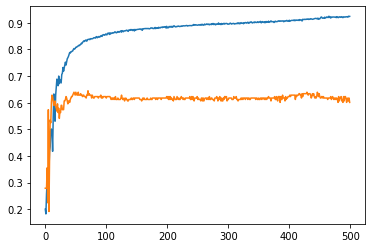

In [87]:
plt.plot(range(500), history.history['accuracy'])
plt.plot(range(500), history.history['val_accuracy'])

In [80]:
history = model.fit(X_train_kpca, y_train_sampled_oh, epochs=500, validation_data=(X_test_kpca, y_test_oh))

Epoch 1/500
55/55 [==============================] - 0s 2ms/step - loss: 0.2830 - accuracy: 0.8977 - val_loss: 1.8536 - val_accuracy: 0.6339
Epoch 2/500
55/55 [==============================] - 0s 2ms/step - loss: 0.2862 - accuracy: 0.8960 - val_loss: 1.8518 - val_accuracy: 0.6448
Epoch 3/500
55/55 [==============================] - 0s 2ms/step - loss: 0.2884 - accuracy: 0.8954 - val_loss: 1.8512 - val_accuracy: 0.6284
Epoch 4/500
55/55 [==============================] - 0s 2ms/step - loss: 0.2861 - accuracy: 0.8977 - val_loss: 1.8526 - val_accuracy: 0.6393
Epoch 5/500
55/55 [==============================] - 0s 2ms/step - loss: 0.2884 - accuracy: 0.8960 - val_loss: 1.8540 - val_accuracy: 0.6284
Epoch 6/500
55/55 [==============================] - 0s 2ms/step - loss: 0.2832 - accuracy: 0.8966 - val_loss: 1.8548 - val_accuracy: 0.6230
Epoch 7/500
55/55 [==============================] - 0s 2ms/step - loss: 0.2819 - accuracy: 0.8960 - val_loss: 1.8573 - val_accuracy: 0.6284
Epoch 8/500
5

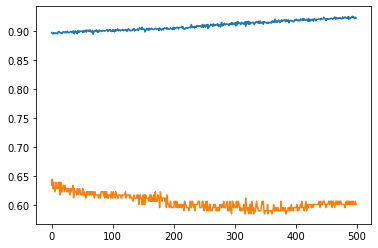

In [81]:
plt.plot(range(500), history.history['accuracy'])
plt.plot(range(500), history.history['val_accuracy'])

In [0]:
y_pred = model.predict_classes(X_test)

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 0,  0,  0,  0,  0,  0],
       [67, 16,  2,  1,  1,  0],
       [20, 25,  3,  3,  0,  0],
       [ 0, 12, 13,  4,  3,  0],
       [ 1,  1,  5,  1,  0,  0],
       [ 0,  1,  2,  1,  1,  0]])

In [31]:
b

0.5846994519233704

In [146]:
X_train_original_lda.shape

(728, 4)

In [0]:
input_original= Input(shape=48)
input_original_extracted = Input(shape=48)
input_original_kpca = Input(shape=50)
input_original_lda = Input(shape=4)

a = Dense(16, 'relu')(input_original)
a = Dense(8)(a)

b = Dense(16)(input_original_extracted)
b = Dense(8)(b)

c = Dense(16, 'relu')(input_original_kpca)
c = Dense(8)(c)

d = Dense(16)(input_original_lda)
d = Dense(8)(d)

concat = concatenate([a,b,c,d])

x= Dense(8, 'relu')(concat)
prediction = Dense(5, 'softmax')(x)

model = Model([input_original, input_original_extracted, input_original_kpca, input_original_lda], prediction)

In [152]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 48)]         0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 48)]         0                                            
__________________________________________________________________________________________________
input_7 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
input_8 (InputLayer)            [(None, 4)]          0                                            
______________________________________________________________________________________________

In [154]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# mc = ModelCheckpoint('drive/My Drive/Colab Notebooks/dataset/model'+str(i)+'.h5', monitor='val_accuracy', save_best_only=True)
history = model.fit([X_train, X_train_original_extracted, X_train_original_kpca, X_train_original_lda], y_train_oh, epochs=500, validation_data=([X_test, X_test_original_extracted, X_test_original_kpca, X_test_original_lda], y_test_oh)) #, callbacks=[mc])

Epoch 1/500
23/23 [==============================] - 0s 9ms/step - loss: 1.7626 - accuracy: 0.2459 - val_loss: 1.3047 - val_accuracy: 0.4699
Epoch 2/500
23/23 [==============================] - 0s 4ms/step - loss: 1.2123 - accuracy: 0.5096 - val_loss: 1.1330 - val_accuracy: 0.5355
Epoch 3/500
23/23 [==============================] - 0s 4ms/step - loss: 1.0952 - accuracy: 0.5302 - val_loss: 1.0560 - val_accuracy: 0.5792
Epoch 4/500
23/23 [==============================] - 0s 4ms/step - loss: 1.0259 - accuracy: 0.5728 - val_loss: 1.0007 - val_accuracy: 0.6011
Epoch 5/500
23/23 [==============================] - 0s 4ms/step - loss: 0.9820 - accuracy: 0.6058 - val_loss: 0.9610 - val_accuracy: 0.6284
Epoch 6/500
23/23 [==============================] - 0s 4ms/step - loss: 0.9464 - accuracy: 0.6305 - val_loss: 0.9358 - val_accuracy: 0.6448
Epoch 7/500
23/23 [==============================] - 0s 4ms/step - loss: 0.9225 - accuracy: 0.6442 - val_loss: 0.9193 - val_accuracy: 0.6393
Epoch 8/500
2

# Multivariate Gaussian 

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [0]:
X_sm2 = pd.DataFrame(X_sm2)
X_test = pd.DataFrame(X_test)

In [0]:
pd.DataFrame(X_train)

In [0]:
X1_mean = X_train.iloc[np.where(y_train==1)].describe().iloc[1, :]
X1_std = X_train.iloc[np.where(y_train==1)].describe().iloc[2, :]

X2_mean = X_train.iloc[np.where(y_train==2)].describe().iloc[1, :]
X2_std = X_train.iloc[np.where(y_train==2)].describe().iloc[2, :]

X3_mean = X_train.iloc[np.where(y_train==3)].describe().iloc[1, :]
X3_std = X_train.iloc[np.where(y_train==3)].describe().iloc[2, :]

X4_mean = X_train.iloc[np.where(y_train==4)].describe().iloc[1, :]
X4_std = X_train.iloc[np.where(y_train==4)].describe().iloc[2, :]

X5_mean = X_train.iloc[np.where(y_train==5)].describe().iloc[1, :]
X5_std = X_train.iloc[np.where(y_train==5)].describe().iloc[2, :]

In [0]:
X1_mean = X_train.iloc[np.where(y_sm2==1)].describe().iloc[1, :]
X1_std = X_train.iloc[np.where(y_sm2==1)].describe().iloc[2, :]

X2_mean = X_train.iloc[np.where(y_sm2==2)].describe().iloc[1, :]
X2_std = X_train.iloc[np.where(y_sm2==2)].describe().iloc[2, :]

X3_mean = X_train.iloc[np.where(y_sm2==3)].describe().iloc[1, :]
X3_std = X_train.iloc[np.where(y_sm2==3)].describe().iloc[2, :]

X4_mean = X_train.iloc[np.where(y_sm2==4)].describe().iloc[1, :]
X4_std = X_train.iloc[np.where(y_sm2==4)].describe().iloc[2, :]

X5_mean = X_train.iloc[np.where(y_sm2==5)].describe().iloc[1, :]
X5_std = X_train.iloc[np.where(y_sm2==5)].describe().iloc[2, :]

In [0]:
from scipy.stats import norm

In [0]:
p1 = 1
for i in range(len(X1_mean)):
  p1 = p1 * norm.pdf( X_train.iloc[np.where(y_train==1)].iloc[:,i].values, X1_mean[i], X1_std[i])

p2 = 1
for i in range(len(X2_mean)):
  p2 = p2 * norm.pdf( X_train.iloc[np.where(y_train==2)].iloc[:,i].values, X2_mean[i], X2_std[i])

p3 = 1
for i in range(len(X3_mean)):
  p3 = p3 * norm.pdf( X_train.iloc[np.where(y_train==3)].iloc[:,i].values, X3_mean[i], X3_std[i])

p4 = 1
for i in range(len(X4_mean)):
  p4 = p4 * norm.pdf( X_train.iloc[np.where(y_train==4)].iloc[:,i].values, X4_mean[i], X4_std[i])

p5 = 1
for i in range(len(X5_mean)):
  p5 = p5 * norm.pdf( X_train.iloc[np.where(y_train==5)].iloc[:,i].values, X5_mean[i], X5_std[i])

In [0]:
p1 = 1
for i in range(len(X1_mean)):
  p1 = p1 * norm.pdf( X_train.iloc[np.where(y_sm2==1)].iloc[:,i].values, X1_mean[i], X1_std[i])

p2 = 1
for i in range(len(X2_mean)):
  p2 = p2 * norm.pdf( X_train.iloc[np.where(y_sm2==2)].iloc[:,i].values, X2_mean[i], X2_std[i])

p3 = 1
for i in range(len(X3_mean)):
  p3 = p3 * norm.pdf( X_train.iloc[np.where(y_sm2==3)].iloc[:,i].values, X3_mean[i], X3_std[i])

p4 = 1
for i in range(len(X4_mean)):
  p4 = p4 * norm.pdf( X_train.iloc[np.where(y_sm2==4)].iloc[:,i].values, X4_mean[i], X4_std[i])

p5 = 1
for i in range(len(X5_mean)):
  p5 = p5 * norm.pdf( X_train.iloc[np.where(y_sm2==5)].iloc[:,i].values, X5_mean[i], X5_std[i])

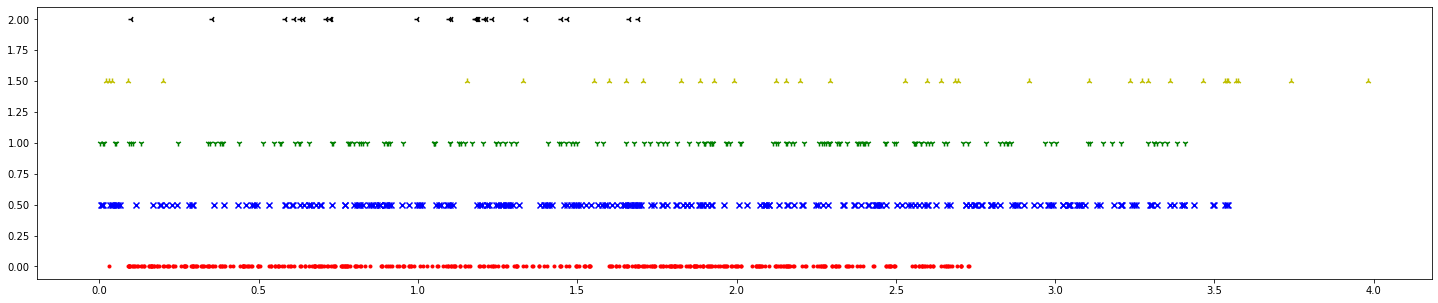

In [322]:
# PCA
plt.figure(figsize=(25,5 ))
plt.scatter(p1, [0]*len(p1), c='r', marker='.')
plt.scatter(p2, [0.5]*len(p2), c='b', marker='x')
plt.scatter(p3, [1]*len(p3), c='g', marker='1')
plt.scatter(p4, [1.5]*len(p4), c='y', marker='2')
plt.scatter(p5, [2]*len(p5), c='k', marker='3')


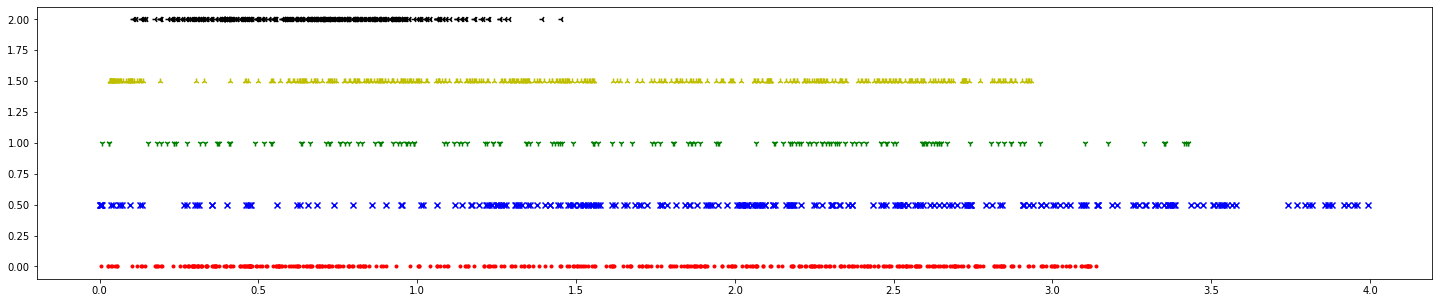

In [58]:
# PCA
plt.figure(figsize=(25,5 ))
plt.scatter(p1, [0]*len(p1), c='r', marker='.')
plt.scatter(p2, [0.5]*len(p2), c='b', marker='x')
plt.scatter(p3, [1]*len(p3), c='g', marker='1')
plt.scatter(p4, [1.5]*len(p4), c='y', marker='2')
plt.scatter(p5, [2]*len(p5), c='k', marker='3')

(412,)

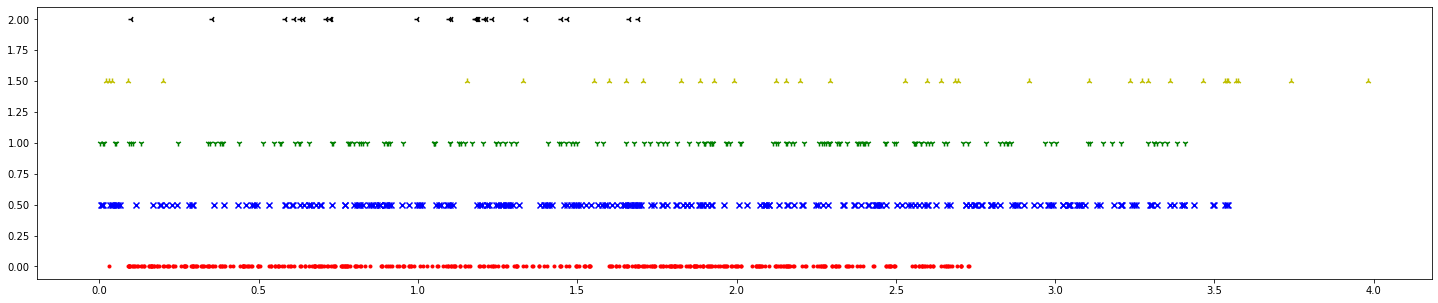

In [323]:
# KernelPCA n = 2
plt.figure(figsize=(25,5 ))
plt.scatter(p1, [0]*len(p1), c='r', marker='.')
plt.scatter(p2, [0.5]*len(p2), c='b', marker='x')
plt.scatter(p3, [1]*len(p3), c='g', marker='1')
plt.scatter(p4, [1.5]*len(p4), c='y', marker='2')
plt.scatter(p5, [2]*len(p5), c='k', marker='3')


(array([48., 46., 49., 30., 33., 30., 61., 46., 30., 39.]),
 array([0.02919885, 0.29933494, 0.56947103, 0.83960712, 1.10974321,
        1.3798793 , 1.65001539, 1.92015149, 2.19028758, 2.46042367,
        2.73055976]),
 <a list of 10 Patch objects>)

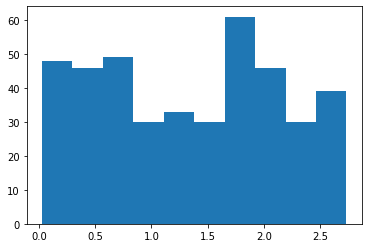

In [324]:
plt.hist(p1)

(array([20., 20., 27., 27., 32., 23., 24., 25., 25., 21.]),
 array([0.00413596, 0.35794887, 0.71176178, 1.06557469, 1.4193876 ,
        1.77320052, 2.12701343, 2.48082634, 2.83463925, 3.18845216,
        3.54226508]),
 <a list of 10 Patch objects>)

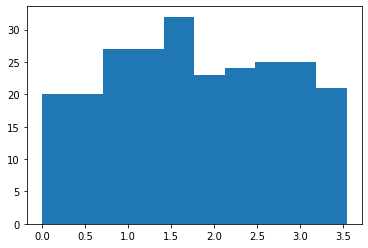

In [325]:
plt.hist(p2)

(array([11., 14., 15., 17., 11., 21., 21., 22.,  9., 13.]),
 array([1.99985313e-03, 3.42670761e-01, 6.83341668e-01, 1.02401258e+00,
        1.36468348e+00, 1.70535439e+00, 2.04602530e+00, 2.38669621e+00,
        2.72736711e+00, 3.06803802e+00, 3.40870893e+00]),
 <a list of 10 Patch objects>)

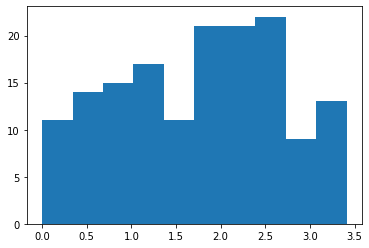

In [326]:
plt.hist(p3)

(array([ 5.,  0.,  1.,  3.,  6.,  4.,  5.,  2., 10.,  2.]),
 array([0.02025391, 0.41646662, 0.81267934, 1.20889206, 1.60510478,
        2.00131749, 2.39753021, 2.79374293, 3.18995564, 3.58616836,
        3.98238108]),
 <a list of 10 Patch objects>)

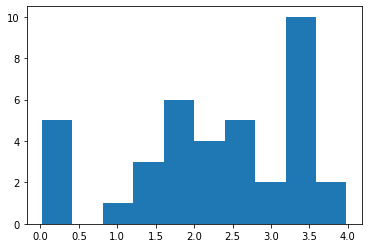

In [327]:
plt.hist(p4)

(array([1., 1., 0., 7., 0., 1., 7., 3., 2., 2.]),
 array([0.09876073, 0.25785017, 0.41693962, 0.57602906, 0.7351185 ,
        0.89420794, 1.05329738, 1.21238683, 1.37147627, 1.53056571,
        1.68965515]),
 <a list of 10 Patch objects>)

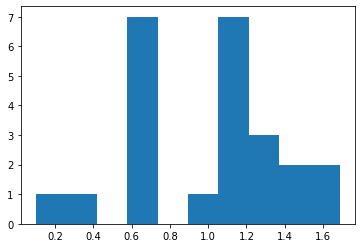

In [328]:
plt.hist(p5)

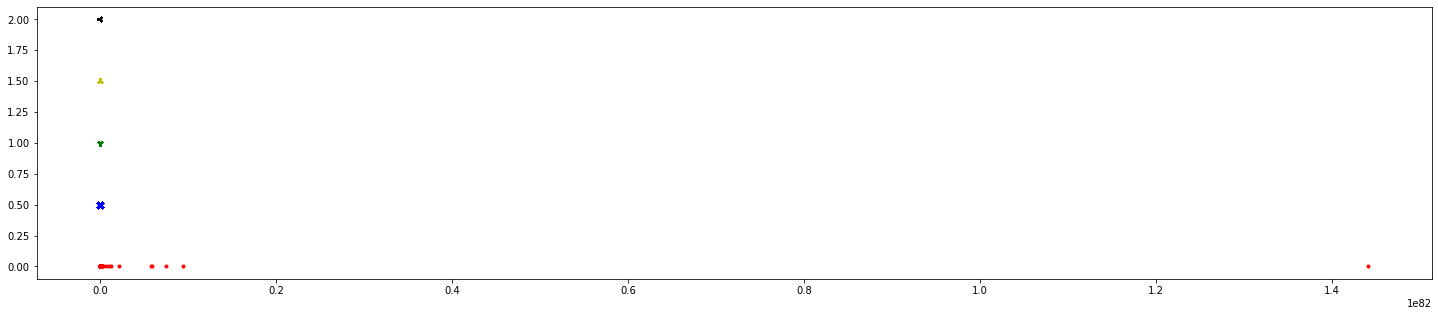

In [301]:
# KernelPCA
plt.figure(figsize=(25,5 ))
plt.scatter(p1, [0]*len(p1), c='r', marker='.')
plt.scatter(p2, [0.5]*len(p2), c='b', marker='x')
plt.scatter(p3, [1]*len(p3), c='g', marker='1')
plt.scatter(p4, [1.5]*len(p4), c='y', marker='2')
plt.scatter(p5, [2]*len(p5), c='k', marker='3')


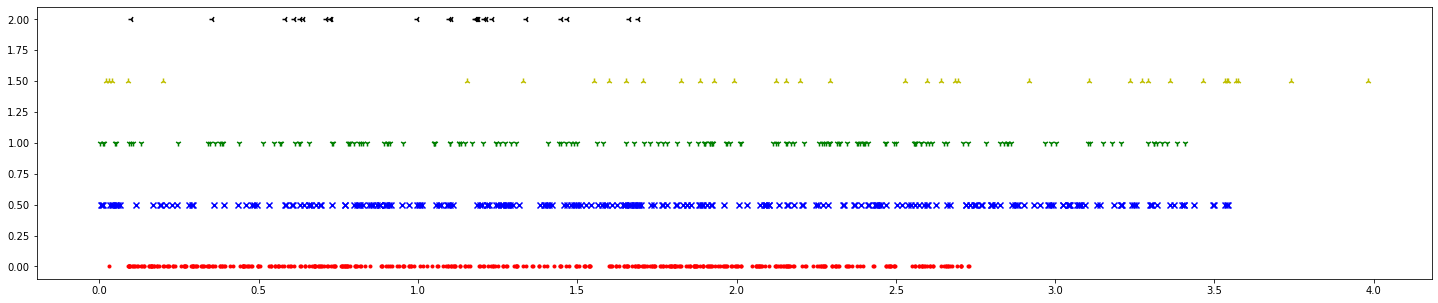

In [338]:
# KernelPCA
plt.figure(figsize=(25,5 ))
plt.scatter(p1, [0]*len(p1), c='r', marker='.')
plt.scatter(p2, [0.5]*len(p2), c='b', marker='x')
plt.scatter(p3, [1]*len(p3), c='g', marker='1')
plt.scatter(p4, [1.5]*len(p4), c='y', marker='2')
plt.scatter(p5, [2]*len(p5), c='k', marker='3')

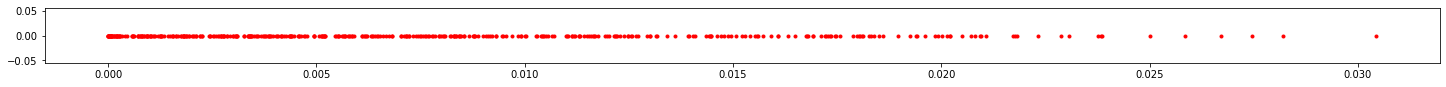

In [227]:
plt.figure(figsize=(25,1))
plt.scatter(p1, [0]*len(p1), c='r', marker='.')


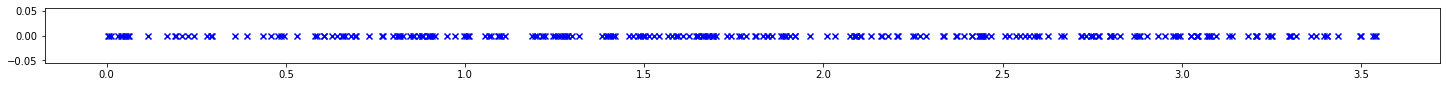

In [337]:
plt.figure(figsize=(25,1))
plt.scatter(p2, [0]*len(p2), c='b', marker='x')

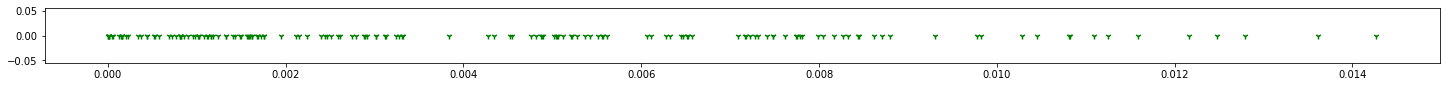

In [232]:
plt.figure(figsize=(25,1))
plt.scatter(p3, [0]*len(p3), c='g', marker='1')

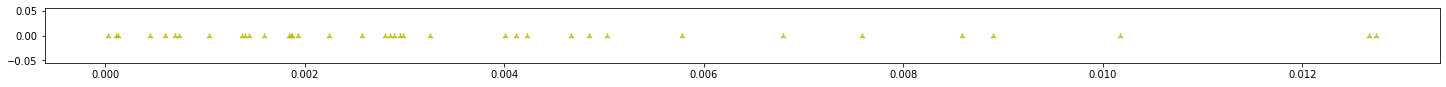

In [233]:
plt.figure(figsize=(25,1))
plt.scatter(p4, [0]*len(p4), c='y', marker='2')

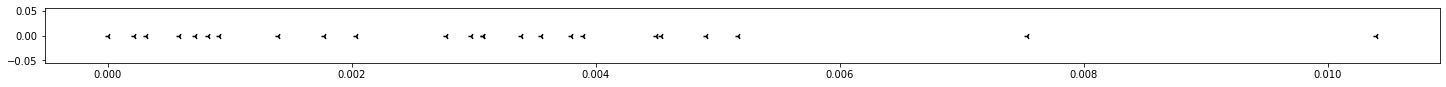

In [234]:
plt.figure(figsize=(25,1))
plt.scatter(p5, [0]*len(p5), c='k', marker='3')

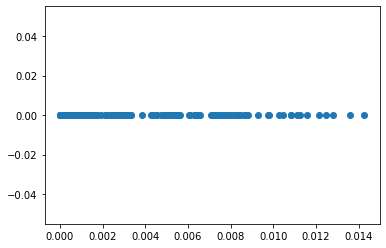

In [229]:
plt.scatter(p3, [0]*len(p3))

In [0]:
sorted(p1)

In [0]:
sorted(p2)

In [0]:
sorted(p3)

In [0]:
sorted(p5)

In [0]:
plt.scatter(p4, [0]*len(p4))

In [0]:
plt.scatter(p5, [0]*len(p5))

In [0]:
p5

In [0]:
p1

# Classify class 1 and 2

In [334]:
X_train.shape

(872, 2)

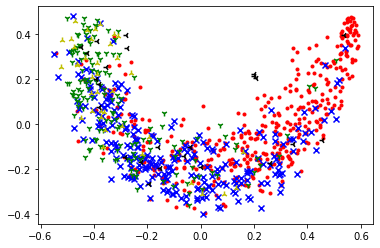

In [352]:
plt.scatter(X_train.iloc[np.where(y_train==1)][0], X_train.iloc[np.where(y_train==1)][1], c='r', marker='.')
plt.scatter(X_train.iloc[np.where(y_train==2)][0], X_train.iloc[np.where(y_train==2)][1], c='b', marker='x')
plt.scatter(X_train.iloc[np.where(y_train==3)][0], X_train.iloc[np.where(y_train==3)][1], c='g', marker='1')
plt.scatter(X_train.iloc[np.where(y_train==4)][0], X_train.iloc[np.where(y_train==4)][1], c='y', marker='2')
plt.scatter(X_train.iloc[np.where(y_train==5)][0], X_train.iloc[np.where(y_train==5)][1], c='k', marker='3')

In [0]:
plt.figure(figsize=(25,10))
plt.scatter(X_train.iloc[np.where(y_sm2==1)][0], X_train.iloc[np.where(y_sm2==1)][1], c='r', marker='.')
plt.scatter(X_train.iloc[np.where(y_sm2==2)][0], X_train.iloc[np.where(y_sm2==2)][1], c='b', marker='x')
plt.scatter(X_train.iloc[np.where(y_sm2==3)][0], X_train.iloc[np.where(y_sm2==3)][1], c='g', marker='1')
plt.scatter(X_train.iloc[np.where(y_sm2==4)][0], X_train.iloc[np.where(y_sm2==4)][1], c='y', marker='2')
plt.scatter(X_train.iloc[np.where(y_sm2==5)][0], X_train.iloc[np.where(y_sm2==5)][1], c='k', marker='3')

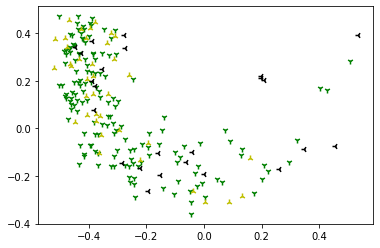

In [351]:
plt.scatter(X_train.iloc[np.where(y_train==3)][0], X_train.iloc[np.where(y_train==3)][1], c='g', marker='1')
plt.scatter(X_train.iloc[np.where(y_train==4)][0], X_train.iloc[np.where(y_train==4)][1], c='y', marker='2')
plt.scatter(X_train.iloc[np.where(y_train==5)][0], X_train.iloc[np.where(y_train==5)][1], c='k', marker='3')

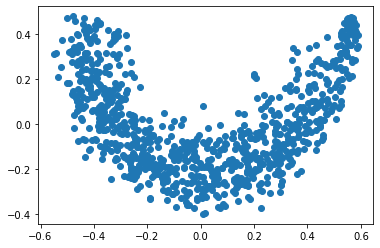

In [339]:
plt.scatter(X_train[0], X_train[1])

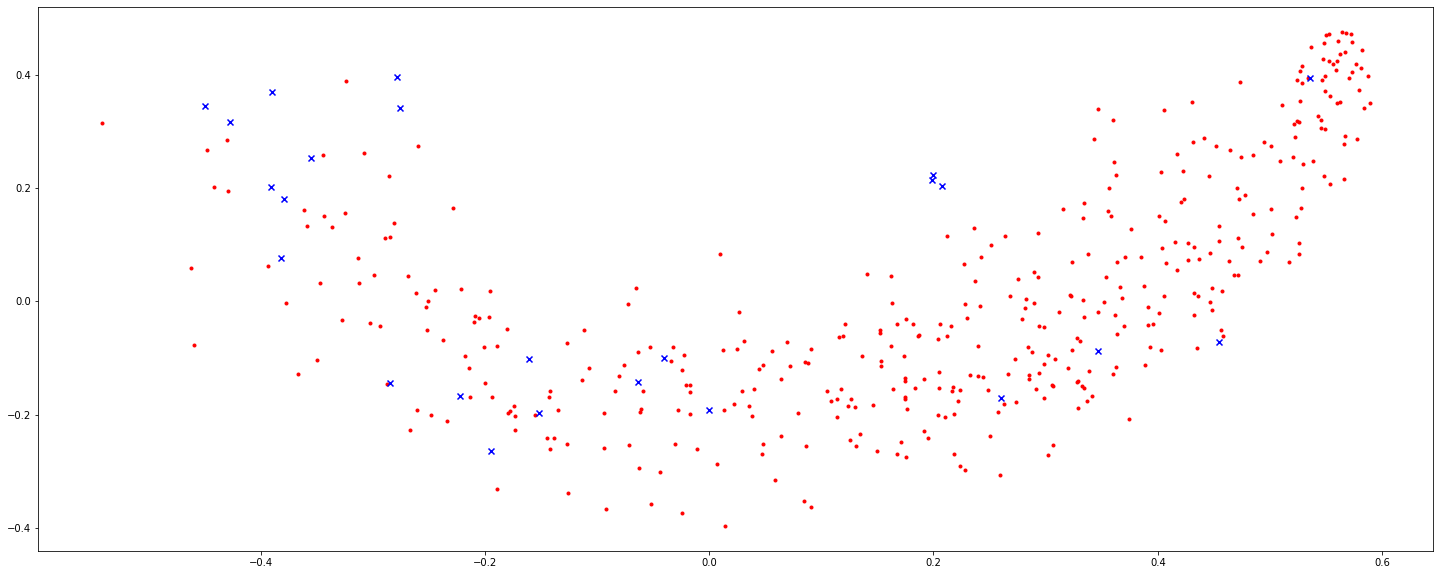

In [355]:
plt.figure(figsize=(25,10))
plt.scatter(X_train.iloc[np.where(y_train==1)][0], X_train.iloc[np.where(y_train==1)][1], c='r', marker='.')
plt.scatter(X_train.iloc[np.where(y_train==5)][0], X_train.iloc[np.where(y_train==5)][1], c='b', marker='x')

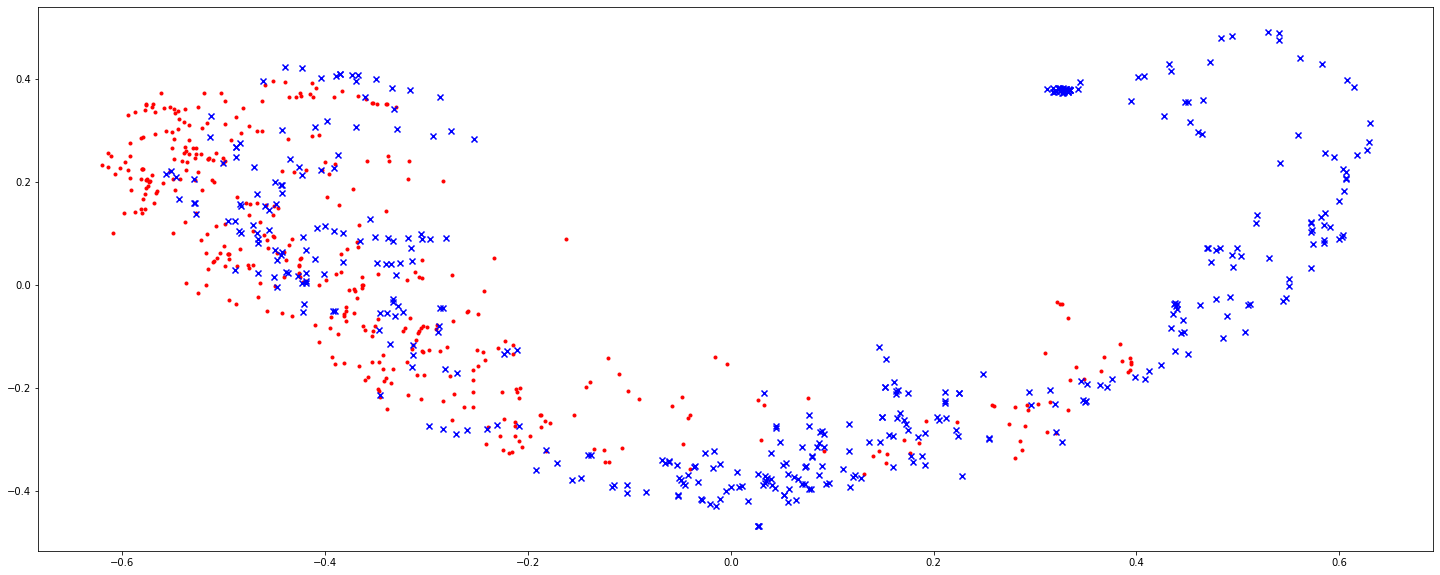

In [62]:
plt.figure(figsize=(25,10))
plt.scatter(X_train.iloc[np.where(y_sm2==4)][0], X_train.iloc[np.where(y_sm2==4)][1], c='r', marker='.')
plt.scatter(X_train.iloc[np.where(y_sm2==5)][0], X_train.iloc[np.where(y_sm2==5)][1], c='b', marker='x')

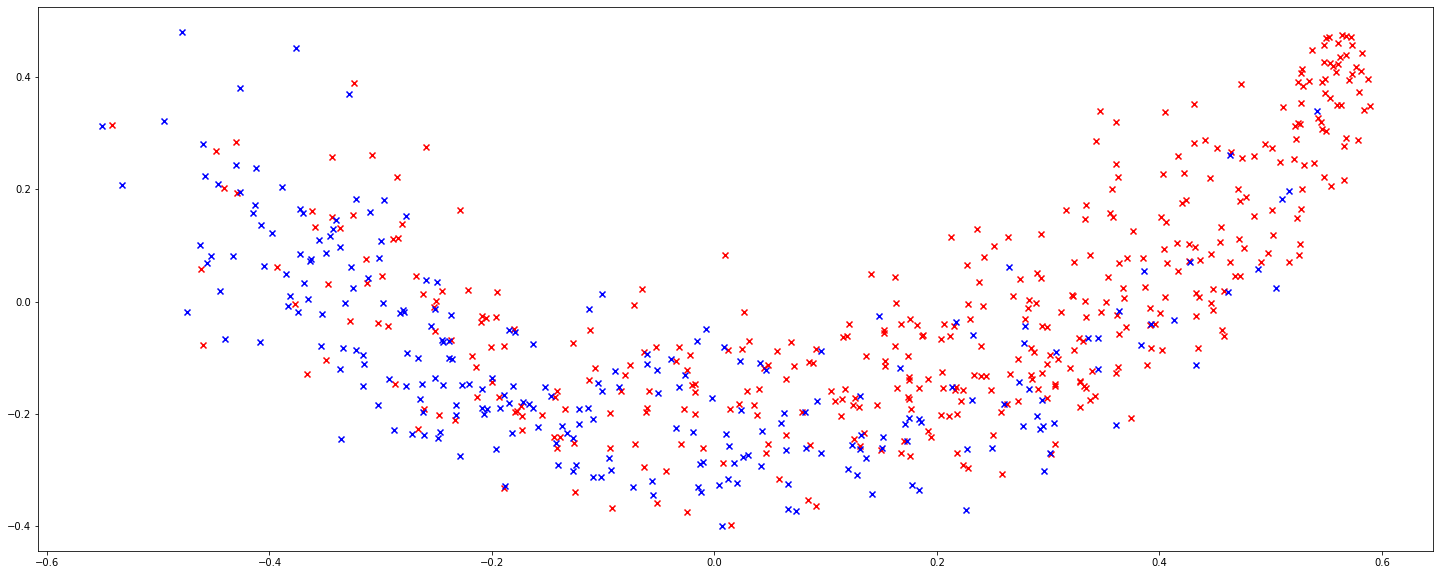

In [357]:
plt.figure(figsize=(25,10))
plt.scatter(X_train.iloc[np.where(y_train==1)][0], X_train.iloc[np.where(y_train==1)][1], c='r', marker='x')
plt.scatter(X_train.iloc[np.where(y_train==2)][0], X_train.iloc[np.where(y_train==2)][1], c='b', marker='x')

# SVM

In [0]:
from sklearn.svm import SVC

In [0]:
f1 = []
for i in range(3,15):
    classifier = SVC(C =1, kernel='poly',random_state=1, degree=i )
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    f1.append(f1_score(y_test, y_pred, average='weighted'))

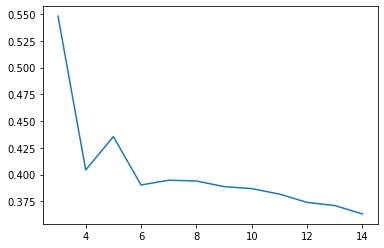

In [402]:
plt.plot(range(3,15), f1)

In [68]:
classifier = SVC(C =0.1, kernel='rbf',random_state=1)
classifier.fit(X_train, y_sm2)
y_pred = classifier.predict(X_test)
(f1_score(y_test, y_pred, average='weighted'))

0.4499704485027382

In [69]:
confusion_matrix(y_pred, y_test)

array([[83, 26,  8,  0,  2],
       [10, 16,  7,  4,  0],
       [ 0,  0,  0,  0,  0],
       [ 4, 12, 21,  5,  5],
       [ 6,  7,  3,  0,  0]])

In [0]:
from sklearn.metrics import f1_score

In [400]:
f1_score(y_test, y_pred, average='weighted')

0.49393078862628714